### This notebook is to explore training dataset categorical features

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from pprint import pprint
from feature_engine import missing_data_imputers as mdi

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('trainoriginal.csv')

In [3]:
df.head()

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,0,8e686a7,fb8cab1,3876,408,24.583,NaN,18.380,0.945945,0.010761,0.026038,0.005685,0.005635,0.0,0.005935,0.000000,4.172,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Manufacturing-dependent,0.550,0.023,0.107,0.062,0.310,0.166,0.100,NaN,0.262,0.342,11.022908,NaN,NaN,217,NaN,NaN,0.471,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342,577
1,1,d1b5fc5,842bd12,10224,1166,28.346,3.0,26.694,0.808959,0.002284,0.173426,0.001803,0.001493,0.0,0.012033,0.000000,7.714,"Nonmetro - Completely rural or less than 2,500...",Micropolitan not adjacent to a metro area,Recreation,0.545,0.040,0.324,0.201,0.253,0.102,0.066,0.070,0.200,0.148,9.904099,NaN,18.26,181,2009.0,1690.0,0.472,0.290,0.077,0.099099,0.202202,0.302302,0.396396,14.482893,3.013219,844
2,2,19a463b,2b7da97,27023,2927,21.641,9.0,31.028,0.956621,0.005141,0.013088,0.004728,0.004708,0.0,0.014809,0.000905,9.789,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Recreation,0.508,0.063,0.129,0.032,0.296,0.215,0.087,0.070,0.187,0.258,11.011502,NaN,19.94,234,4650.0,1350.0,0.496,0.208,0.192,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572,700
3,3,1711ab7,5029ed4,8735,1039,23.110,0.0,27.734,0.894835,0.000298,0.076576,0.000995,0.004297,0.0,0.022999,0.000000,13.735,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.545,0.038,0.207,0.084,0.255,0.182,0.104,0.081,0.169,0.274,12.845770,NaN,30.31,231,4420.0,1749.0,0.503,0.193,0.215,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809,592
4,4,1eb4681,b795815,3681,365,21.985,2.0,19.673,0.923886,0.000496,0.042889,0.000000,0.013622,0.0,0.016905,0.002202,8.217,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Farm-dependent,0.474,0.034,0.177,0.075,0.324,0.118,0.113,NaN,0.178,0.340,11.565750,NaN,NaN,270,NaN,1249.0,0.516,0.222,0.230,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926,444


In [4]:
df.tail()

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
1557,1557,8a15c79,a952566,18983,1480,22.621,41.0,26.905,0.847652,0.064786,0.048670,0.000000,0.012277,0.001800,0.024815,0.000000,5.699,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Nonspecialized,0.517,0.044,0.216,0.086,0.302,NaN,0.096,0.079,NaN,0.227,12.942281,NaN,28.94,207,6299.0,4660.0,0.510,0.243,0.144,0.153614,0.347390,0.263052,0.235944,11.369618,7.211285,928
1558,1558,ffaffbd,e2f94fa,18837,2144,28.649,7.0,26.515,0.925500,0.010666,0.028790,0.000398,0.020893,0.001085,0.012667,0.000000,6.789,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to micro area and contains a ...,Nonspecialized,0.559,0.043,0.112,0.038,0.294,0.169,0.081,0.060,0.166,0.242,10.669456,NaN,18.02,272,2030.0,1249.0,0.510,0.205,0.193,0.070858,0.371257,0.311377,0.246507,9.330009,12.600874,640
1559,1559,4268c79,a952566,77224,4677,18.928,137.0,28.827,0.883936,0.070858,0.019081,0.000614,0.012569,0.000302,0.011835,0.000805,6.294,"Metro - Counties in metro areas of 250,000 to ...",Small-in a metro area with fewer than 1 millio...,Nonspecialized,0.498,0.051,0.172,0.071,0.260,0.193,0.096,0.080,0.168,0.298,12.962100,NaN,13.78,237,6979.0,1529.0,0.503,0.211,0.179,0.118644,0.311067,0.302094,0.268195,9.029286,8.846613,754
1560,1560,ff00193,4cd9667,4698,402,20.107,1.0,48.980,0.173909,0.000911,0.824579,0.000401,0.000000,0.000000,0.000000,0.000200,17.300,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Federal/State government-dependent,0.493,0.112,0.273,0.129,0.235,0.171,0.099,0.110,0.131,0.246,10.244994,NaN,NaN,192,4710.0,NaN,0.484,0.195,0.206,0.164000,0.354000,0.342000,0.140000,8.445214,9.744478,640
1561,1561,38ccdfd,1dcfd4e,650813,92680,37.789,NaN,30.687,0.704111,0.057262,0.161265,0.003829,0.027315,0.003196,0.041223,0.001799,8.343,"Metro - Counties in metro areas of 250,000 to ...",Small-in a metro area with fewer than 1 millio...,Nonspecialized,0.462,0.060,0.185,0.084,0.216,0.178,0.059,0.100,0.149,0.174,13.099012,4.2,9.88,218,1069.0,1749.0,0.504,0.255,0.108,0.061876,0.208583,0.370259,0.359281,13.944628,6.173158,976


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 46 columns):
row_id                                        1562 non-null int64
county_code                                   1562 non-null object
state                                         1562 non-null object
population                                    1562 non-null int64
renter_occupied_households                    1562 non-null int64
pct_renter_occupied                           1562 non-null float64
evictions                                     1235 non-null float64
rent_burden                                   1562 non-null float64
pct_white                                     1562 non-null float64
pct_af_am                                     1562 non-null float64
pct_hispanic                                  1562 non-null float64
pct_am_ind                                    1562 non-null float64
pct_asian                                     1562 non-null float64
pct_nh_pi        

In [6]:
df.describe(include='all')

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,1562.000000,1562,1562,1.562000e+03,1.562000e+03,1562.000000,1235.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562,1562,1562,1562.000000,1562.000000,1560.000000,1560.000000,1560.000000,1344.000000,1560.000000,1446.000000,1100.000000,1560.000000,1542.000000,613.000000,1372.000000,1562.000000,1447.000000,1448.000000,1560.000000,1560.000000,1560.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
unique,NaN,1562,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,12,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,0a95e99,1b0d913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nonmetro - Urban population of 2,500 to 19,999...",Small-in a metro area with fewer than 1 millio...,Nonspecialized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301,358,631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,780.500000,NaN,NaN,1.083407e+05,1.490462e+04,28.525570,397.410526,28.537526,0.769045,0.088593,0.092012,0.018431,0.012709,0.000711,0.017583,0.000916,12.182780,NaN,NaN,NaN,0.470535,0.062551,0.220037,0.088844,0.304546,0.211682,0.106566,0.083326,0.164818,0.276981,11.637336,5.752414,21.715153,275.482714,3421.828611,2508.303867,0.499388,0.228672,0.167707,0.145666,0.346271,0.303030,0.205033,11.621356,10.415138,701.142125
std,451.054875,NaN,NaN,3.745229e+05,6.255947e+04,8.121601,1522.801074,4.670467,0.203306,0.143505,0.141599,0.074762,0.026693,0.003059,0.015836,0.001657,5.783889,NaN,NaN,NaN,0.070936,0.022615,0.067500,0.041480,0.043550,0.064045,0.022521,0.021239,0.051483,0.053098,1.534144,4.297808,10.721369,57.827540,2538.670834,1960.312344,0.023933,0.034732,0.044555,0.067483,0.071152,0.052236,0.092001,2.756009,2.772070,192.883110
min,0.000000,NaN,NaN,2.690000e+02,6.400000e+01,7.279000,-1.000000,9.909000,0.009547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.186000,0.012000,0.053000,0.018000,0.133000,0.031000,0.033000,0.030000,0.032000,0.104000,7.209413,-0.080000,3.140000,76.000000,340.000000,279.000000,0.314000,0.082000,0.036000,0.019000,0.074297,0.114458,0.064128,3.654080,0.961076,351.000000
25%,390.250000,NaN,NaN,1.045275e+04,1.078250e+03,22.874000,3.000000,25.869000,0.649967,0.005523,0.018747,0.001201,0.002391,0.000000,0.009465,0.000000,7.991000,NaN,NaN,NaN,0.425000,0.046000,0.171750,0.059000,0.283000,0.169000,0.092000,0.070000,0.129000,0.243000,10.432910,2.710000,14.047500,233.000000,1859.000000,1389.750000,0.495000,0.208000,0.140000,0.094226,0.300601,0.269461,0.142142,10.014818,8.613691,578.000000
50%,780.500000,NaN,NaN,2.528200e+04,2.754000e+03,27.199500,27.000000,28.768000,0.846542,0.020599,0.037613,0.002610,0.005279,0.000000,0.014438,0.000302,11.173500,NaN,NaN,NaN,0.470500,0.061000,0.216000,0.079000,0.306000,0.206000,0.105000,0.080000,0.163000,0.281000,11.907

In [7]:
df.shape

(1562, 46)

### Analyse the categorical features

In [8]:
df_cat = df[['county_code','state','rucc','urban_influence','economic_typology','gross_rent']]

In [9]:
df_cat.head()

,county_code,state,rucc,urban_influence,economic_typology,gross_rent
0,8e686a7,fb8cab1,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Manufacturing-dependent,577
1,d1b5fc5,842bd12,"Nonmetro - Completely rural or less than 2,500...",Micropolitan not adjacent to a metro area,Recreation,844
2,19a463b,2b7da97,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Recreation,700
3,1711ab7,5029ed4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,592
4,1eb4681,b795815,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Farm-dependent,444


In [10]:
df_cat['county_code'].value_counts()

0a95e99     1
73db0d7     1
e4091a7     1
781f349     1
1c2eefd     1
7f24f27     1
3be87d9     1
454aabf     1
c71234b     1
8a15c79     1
d530467     1
b638d31     1
a70db85     1
4ad3c0f     1
0a1e7e3     1
b7a18c7     1
6fff8b3     1
95fa82b     1
9a4bd4b     1
b72bfdf     1
cc4ffcd     1
579b419     1
7cde341     1
99e360d     1
8af78b7     1
afba46f     1
68cdb31     1
e2d5e71     1
486924f     1
cf3b2dd     1
0f43d47     1
0602f87     1
c9c71e7     1
c6d61bf     1
545ccb9     1
f944959     1
d176bd3     1
0f82e57     1
9c249d3     1
9a40429     1
68e20a1     1
1711ab7     1
d1bb875     1
59bc6f3     1
4bba249     1
bbda09b     1
c0a2491     1
3b5c003     1
66ba03d     1
79dd1ff     1
cc52667     1
3a3a857     1
41c01f1     1
e75e6bb     1
f4bf875     1
1a6b597     1
5b64c77     1
8.38E+13    1
bf29927     1
3aa4dfb     1
a310b65     1
52a77d1     1
65122a5     1
77caba3     1
a0ce3f7     1
2448271     1
c9481c3     1
8dd5451     1
a02a8b1     1
2d7ebcb     1
a9acbe7     1
4af036

In [11]:
df_cat['county_code'].nunique()

1562

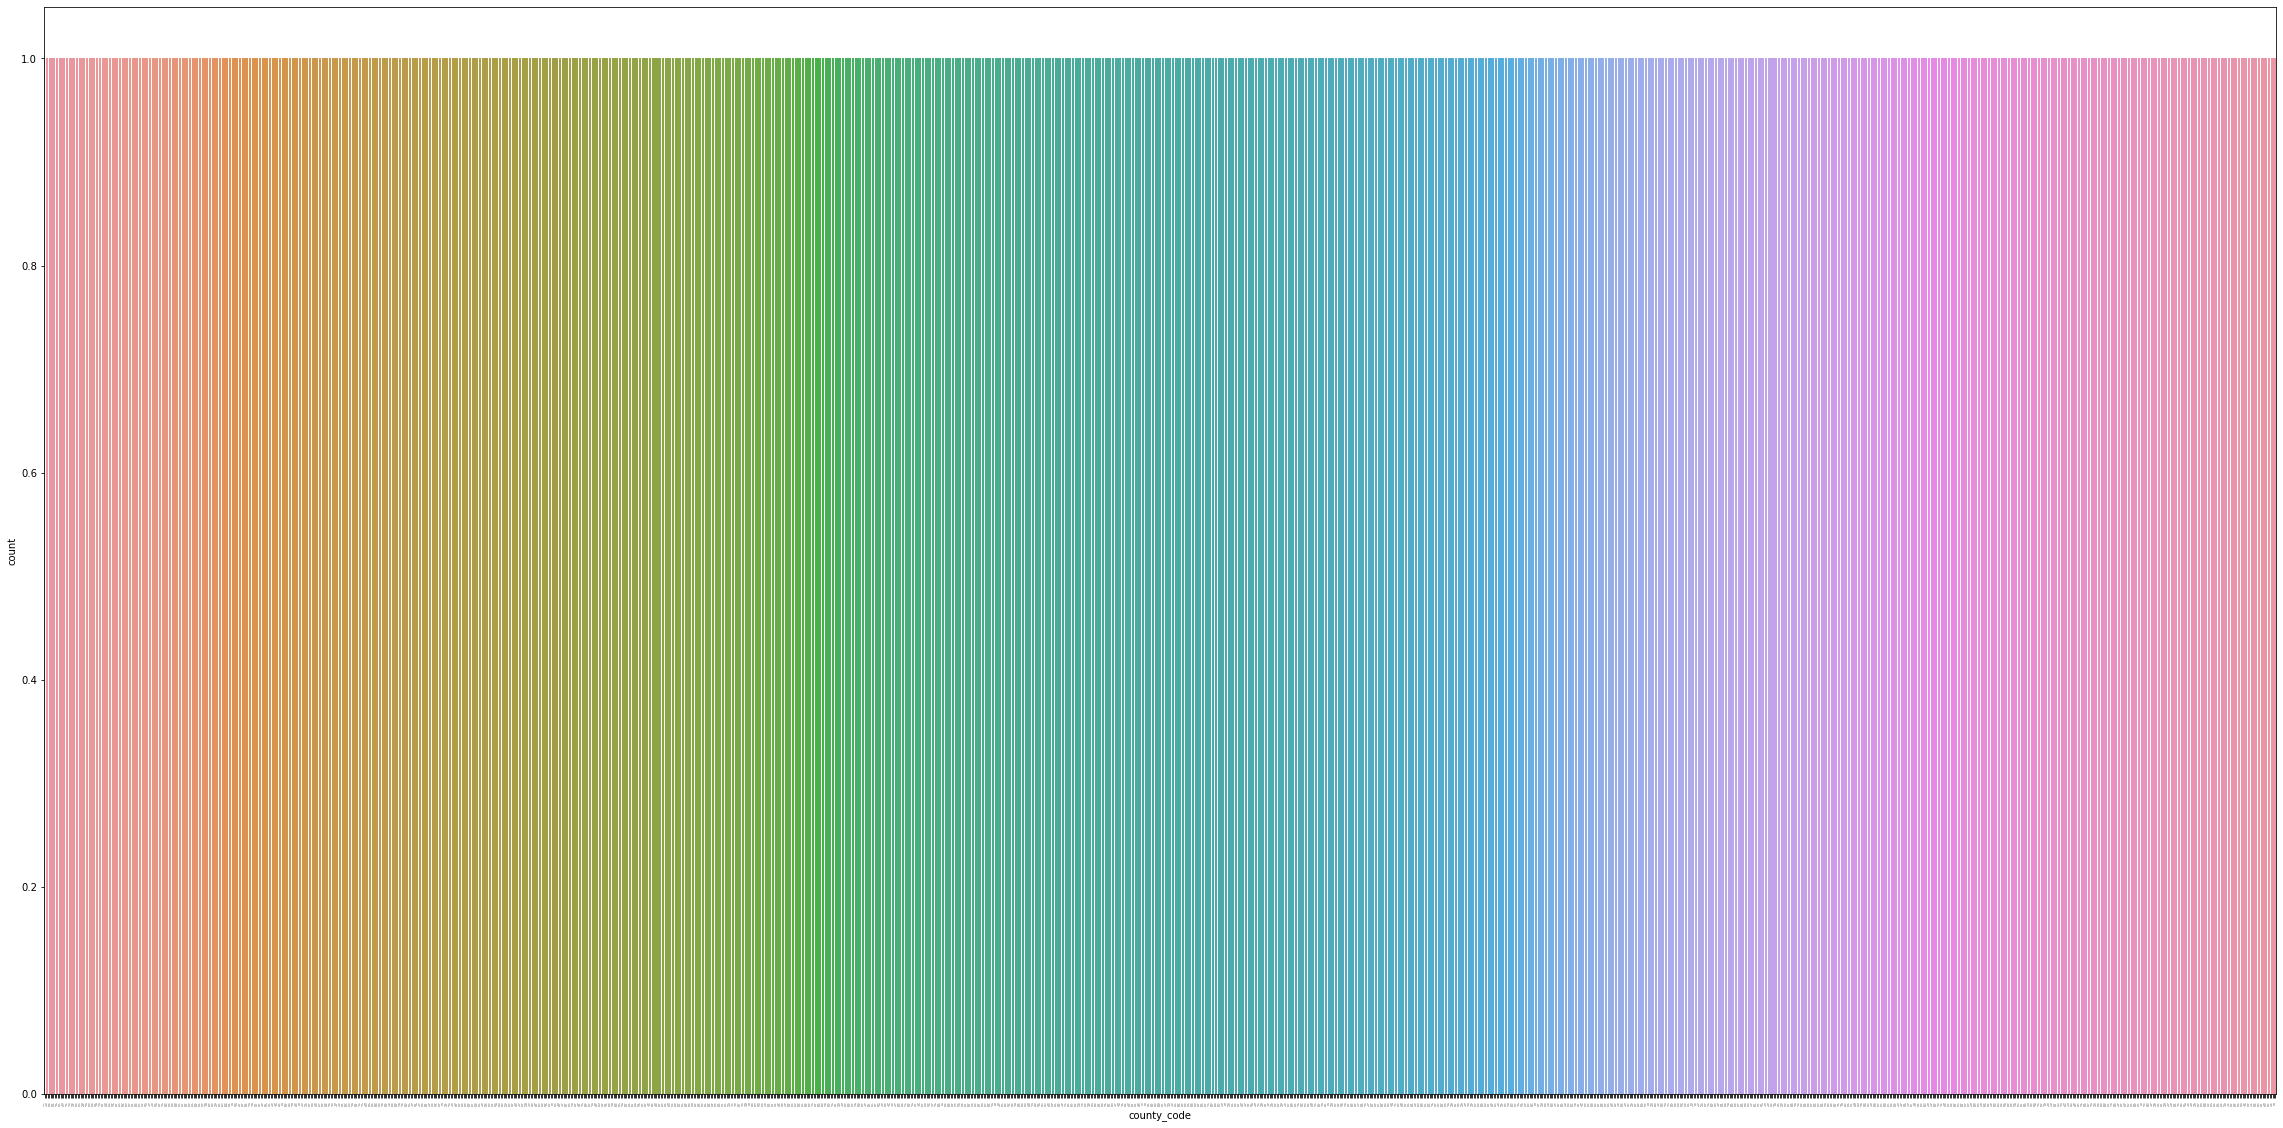

In [12]:
plt.figure(figsize=(40,20))
sns.countplot(x='county_code',data=df_cat)
plt.tick_params(axis='x',which='major',labelsize=1)
plt.xticks(rotation=90)
plt.show()

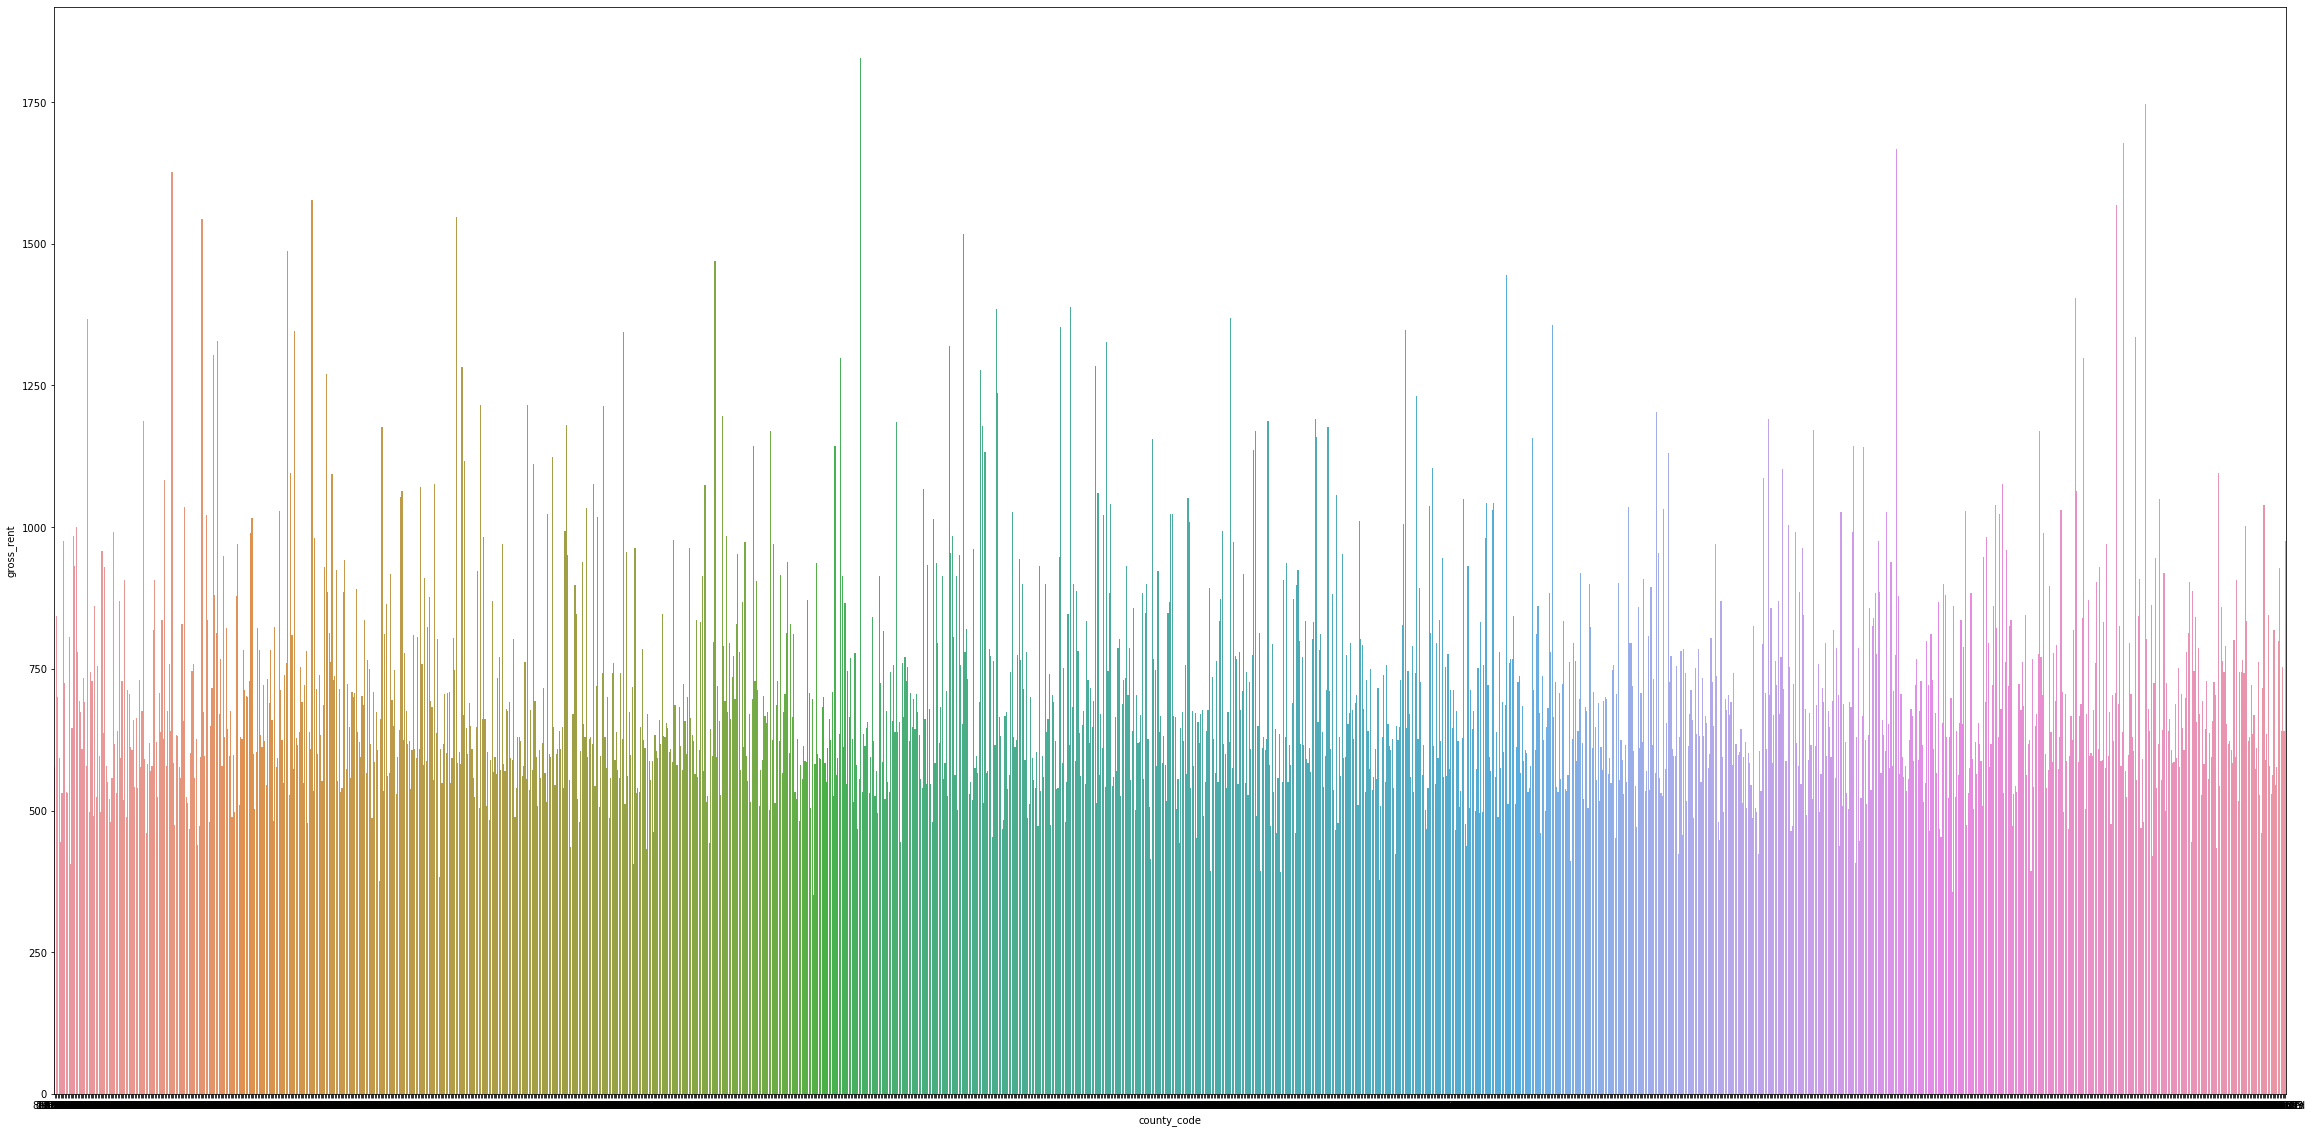

In [13]:
plt.figure(figsize=(40,20))
sns.barplot(x='county_code',y=df_cat.gross_rent,data=df_cat)
plt.show()

In [14]:
df_cat['state'].value_counts()

1b0d913    131
4522abc     93
a952566     69
528ea9f     57
c479f0c     56
20d32fc     56
08f8fb4     54
dc9ae72     50
09d8cd0     47
9d1e27d     47
b795815     45
0f8930b     44
e2f94fa     44
7572db1     40
9d0874a     39
9dda412     39
158df01     38
1dcfd4e     37
e74aca3     36
8036085     35
c3dbf0a     34
78e8330     33
9e0007d     33
52acab4     31
4c72956     31
e899d7f     31
fb8cab1     30
5086a32     28
1646cf6     27
842bd12     26
485e9af     25
698ab34     21
4cd9667     20
3745933     19
7dd3518     18
176f5f0     16
64ffe5d     15
d233cec     10
5029ed4      8
bc77872      7
3337bbb      6
2b7da97      6
b44cfe6      6
fa605d5      6
dfc21f3      6
6d287d7      4
105e445      4
375d4d3      2
914c15f      1
9e065a4      1
Name: state, dtype: int64

In [15]:
df_cat['state'].nunique()

50

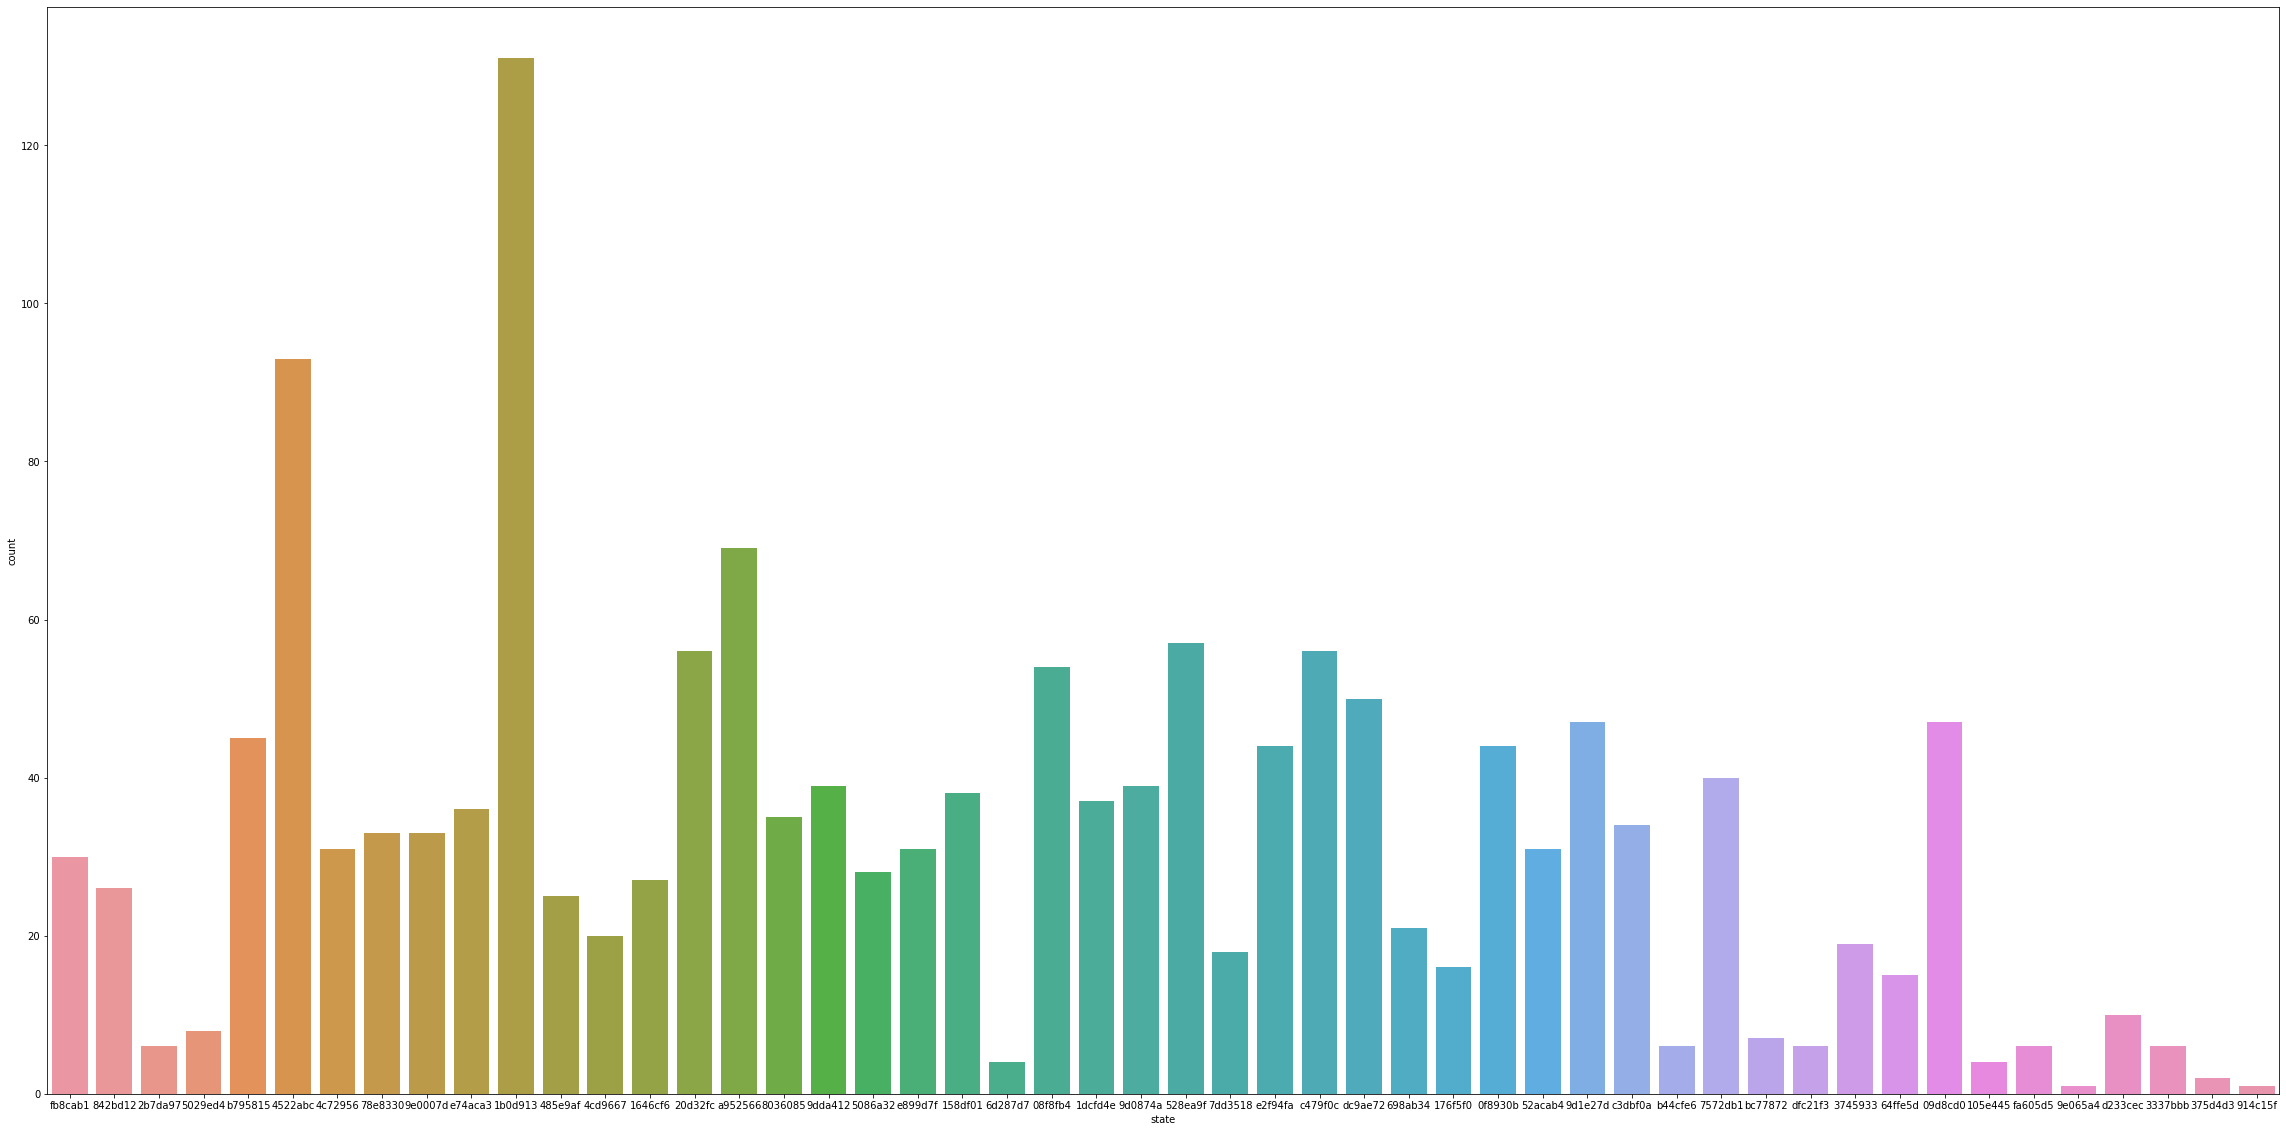

In [16]:
plt.figure(figsize=(40,20))
sns.countplot(x='state',data=df_cat)
plt.show()

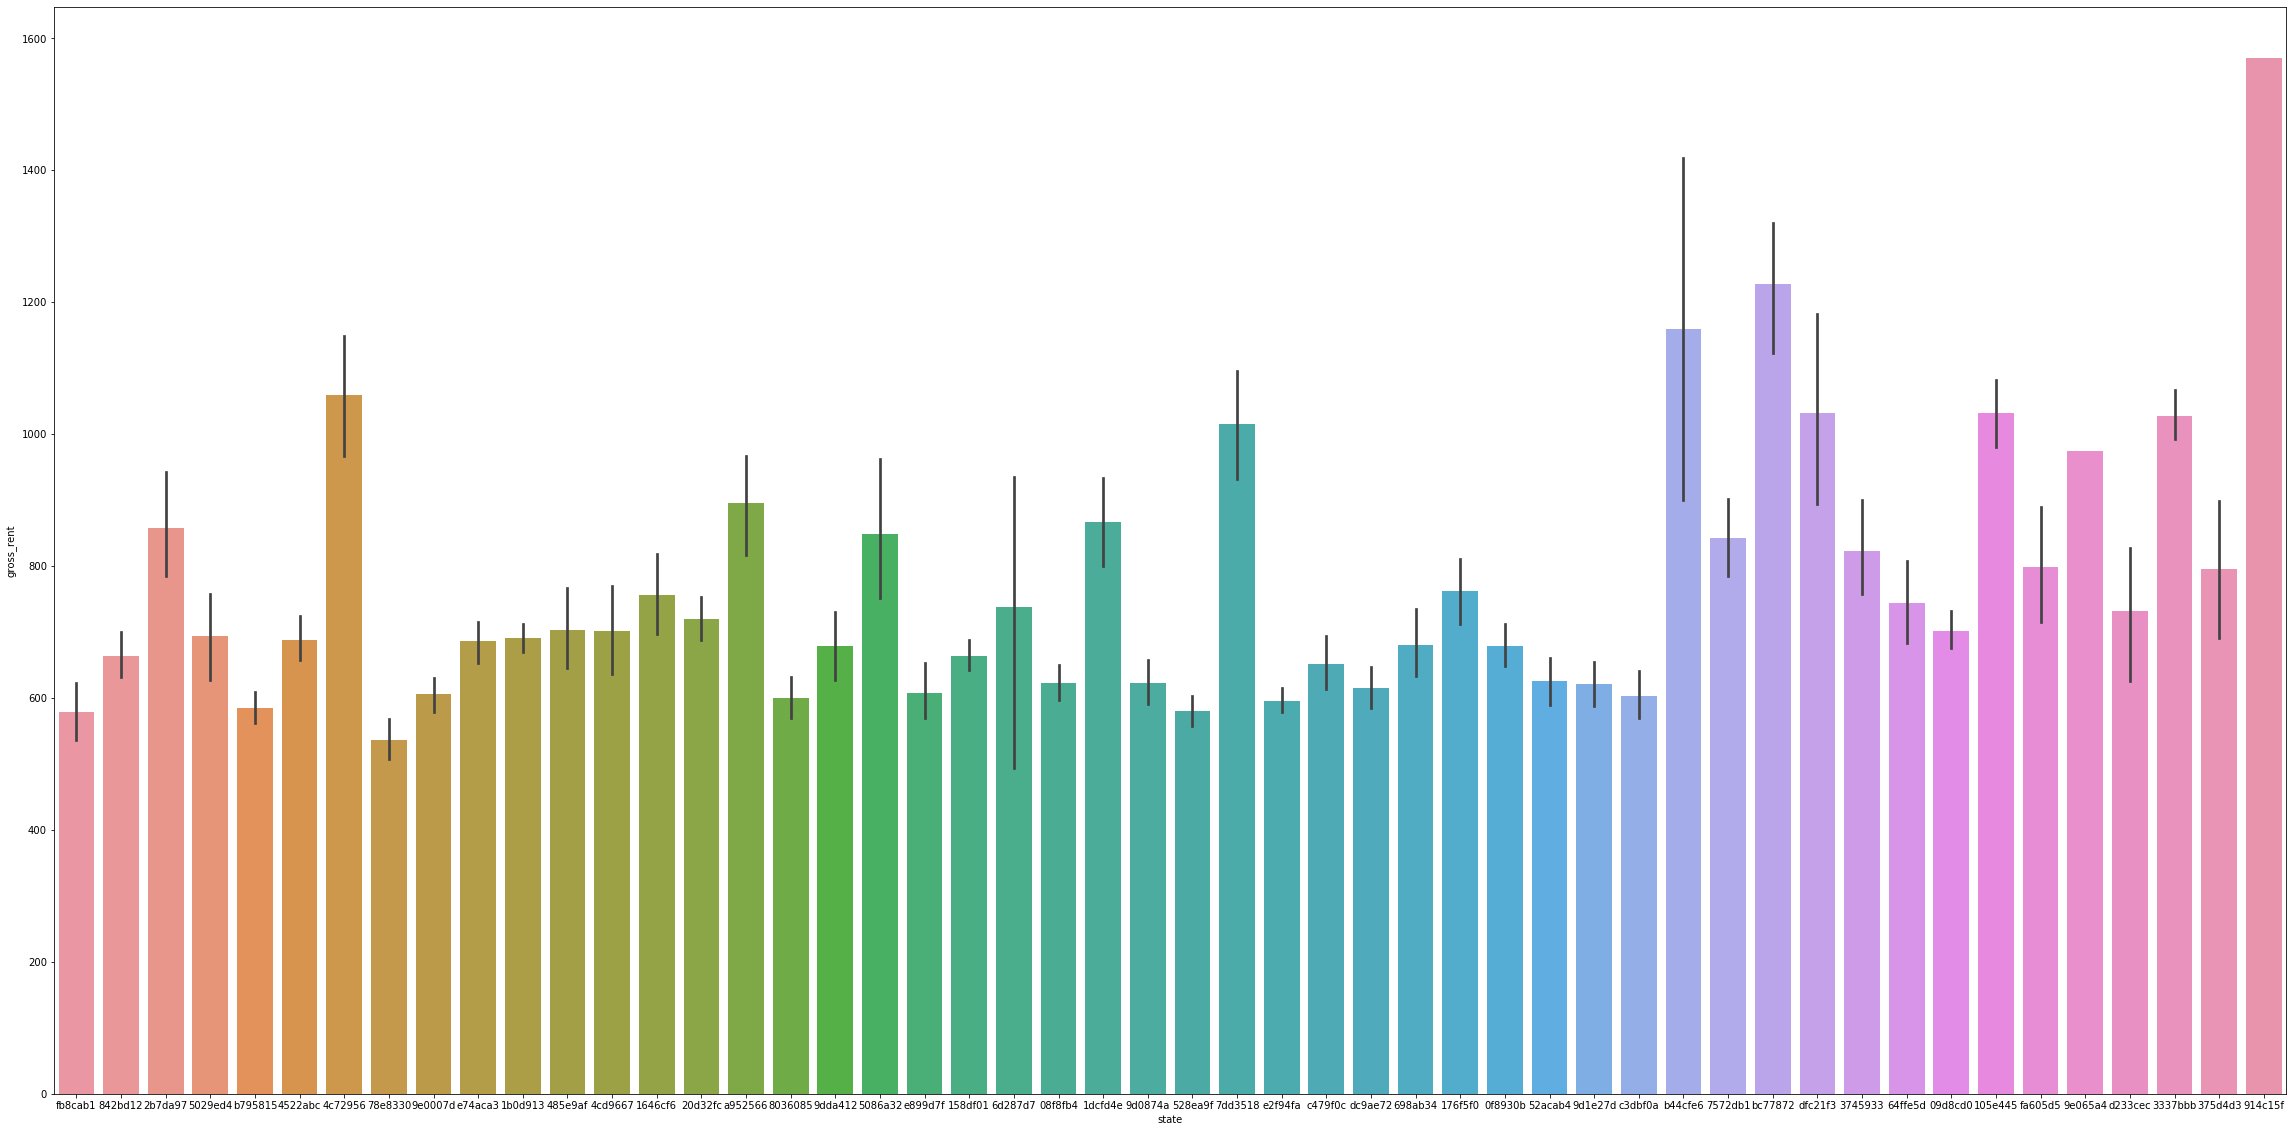

In [17]:
plt.figure(figsize=(40,20))
sns.barplot(x='state',y=df_cat.gross_rent,data=df_cat)
plt.show()

In [18]:
df_cat['rucc'].value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         301
Metro - Counties in metro areas of 1 million population or more                                  219
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    215
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     206
Metro - Counties in metro areas of 250,000 to 1 million population                               193
Metro - Counties in metro areas of fewer than 250,000 population                                 165
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        120
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          101
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                       42
Name: rucc, dtype: int64

In [19]:
df_cat['rucc'].nunique()

9

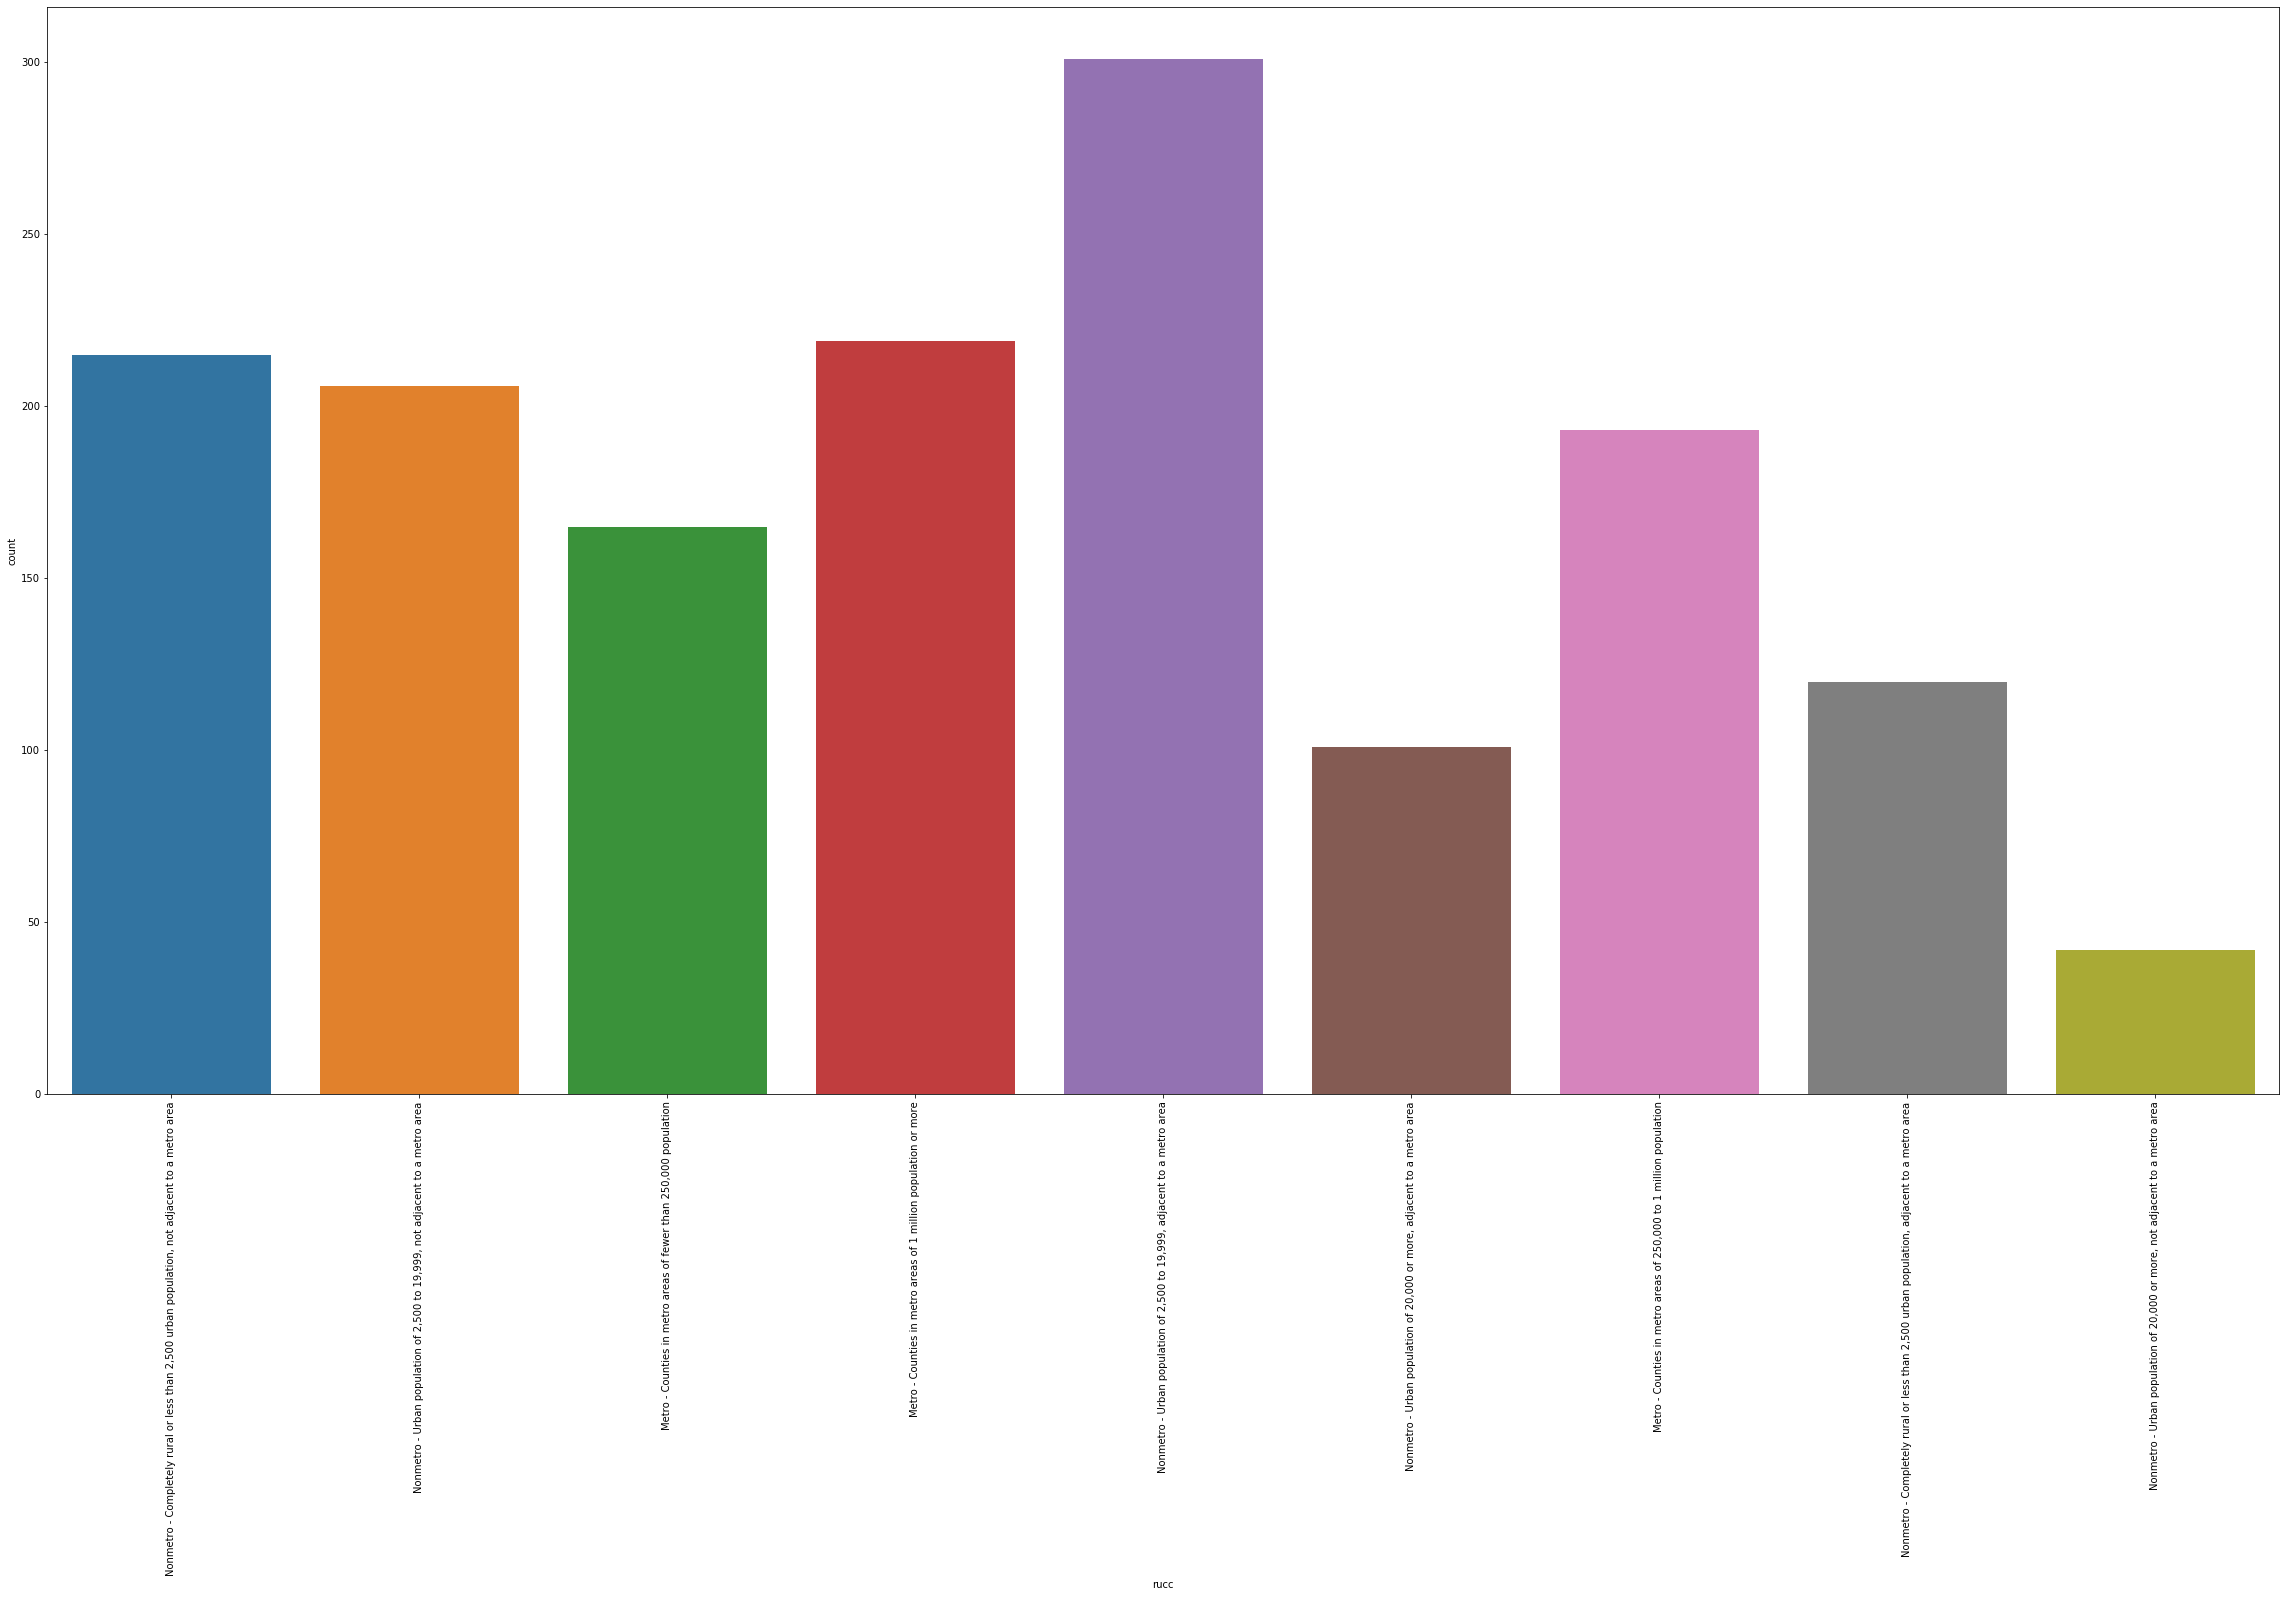

In [20]:
plt.figure(figsize=(40,20))
sns.countplot(x='rucc',data=df_cat)
plt.xticks(rotation=90)
plt.show()

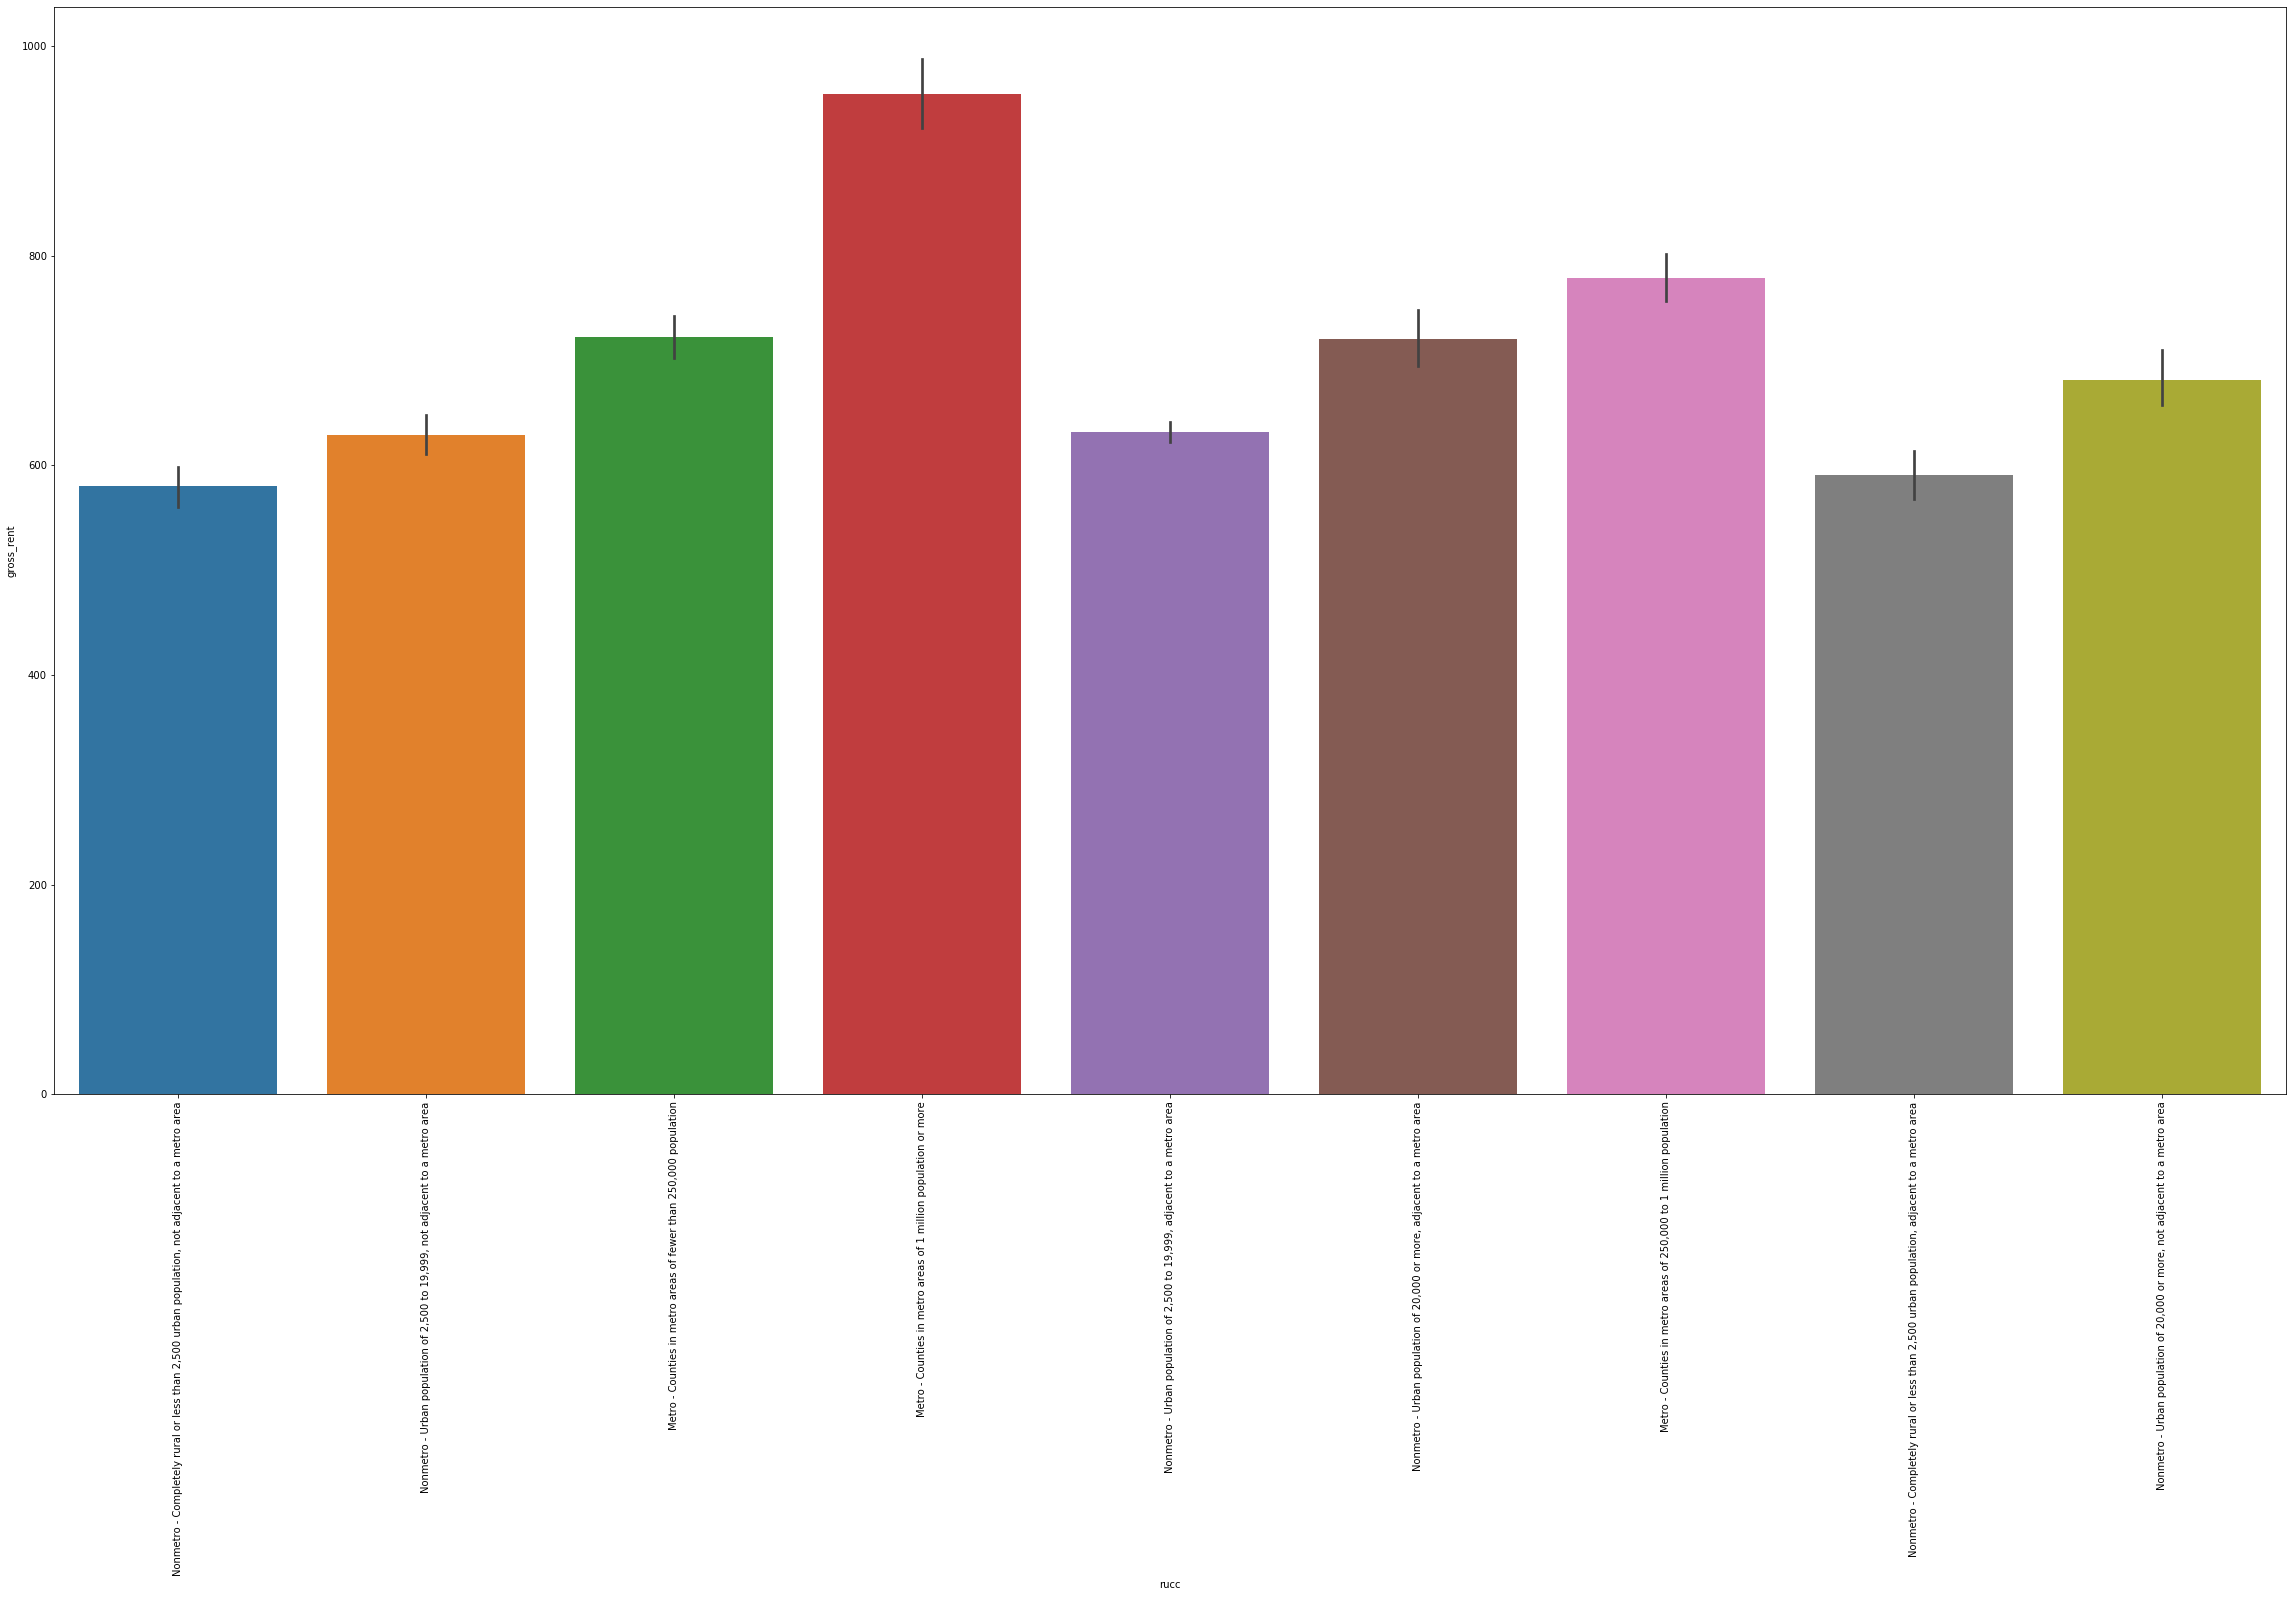

In [21]:
plt.figure(figsize=(40,20))
sns.barplot(x='rucc',y=df_cat.gross_rent,data=df_cat)
plt.xticks(rotation=90)
plt.show()

In [22]:
df_cat['urban_influence'].value_counts()

Small-in a metro area with fewer than 1 million residents                                             358
Large-in a metro area with at least 1 million residents or more                                       219
Noncore adjacent to a small metro with town of at least 2,500 residents                               178
Micropolitan not adjacent to a metro area                                                             131
Micropolitan adjacent to a small metro area                                                           113
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                 97
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents              88
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                           86
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents     86
Noncore adjacent to a large metro area        

In [23]:
df_cat['urban_influence'].nunique()

12

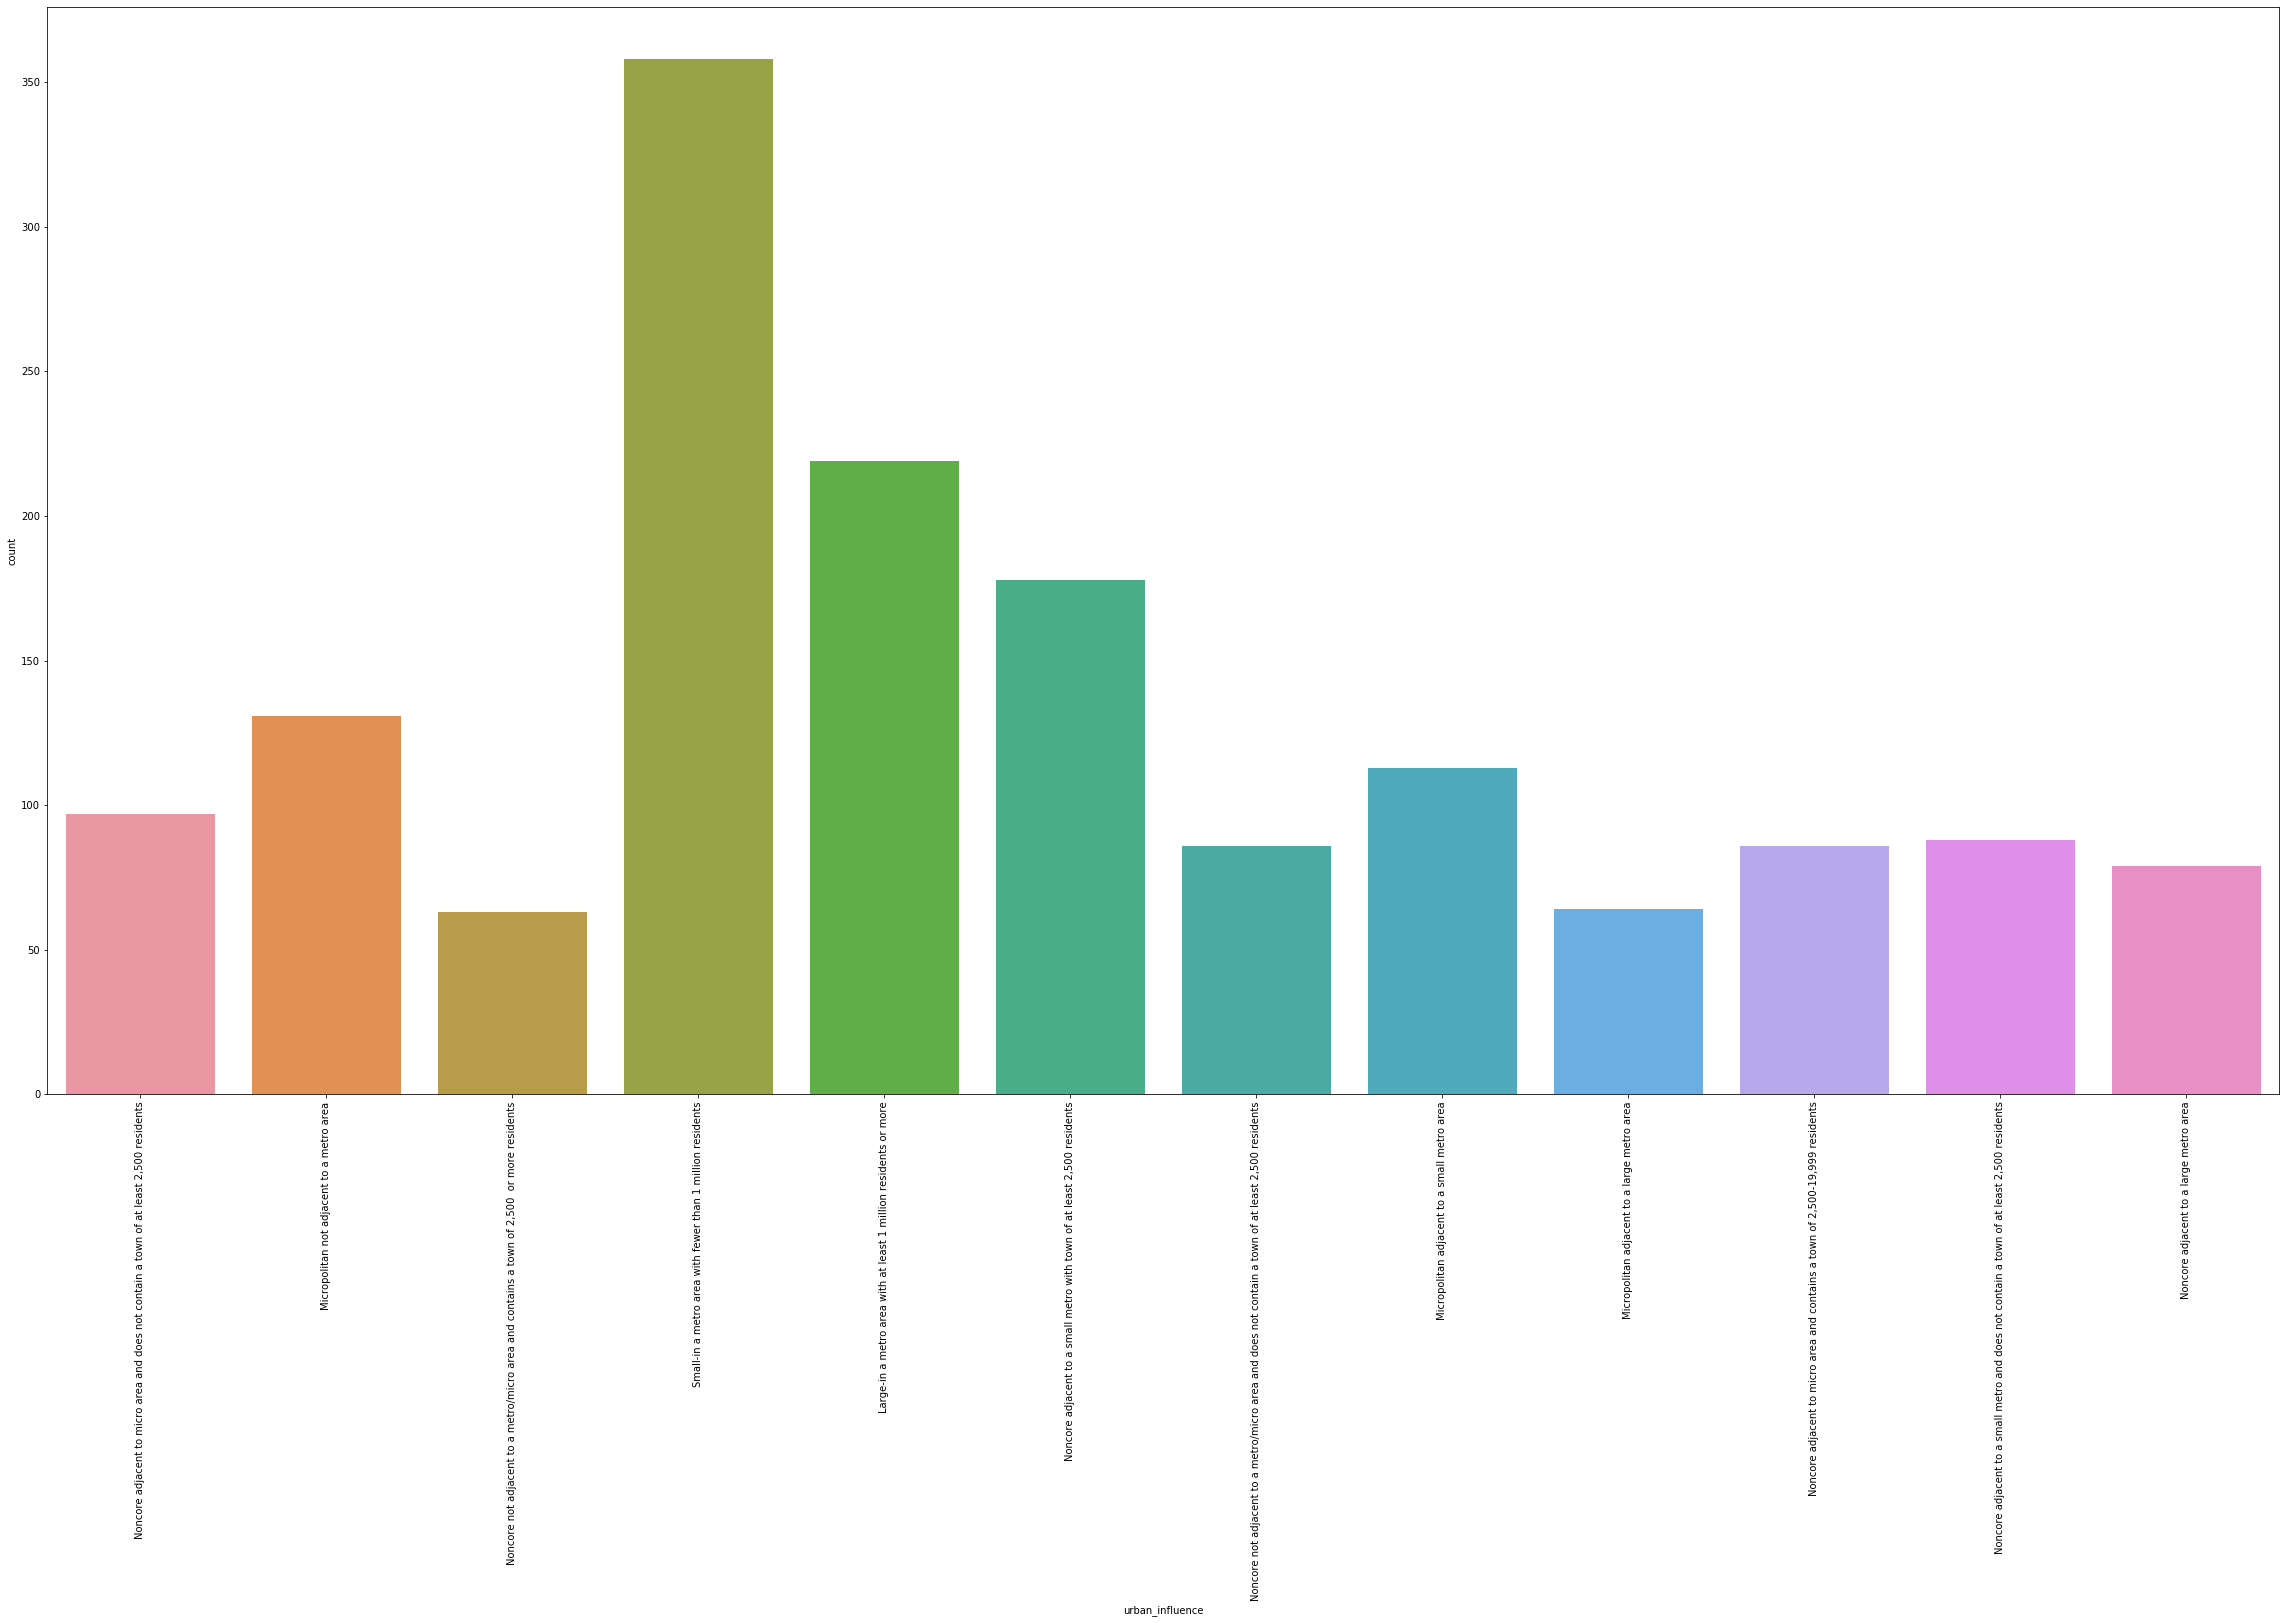

In [24]:
plt.figure(figsize=(40,20))
plt.xticks(rotation=90)
sns.countplot(x='urban_influence',data=df_cat)
plt.show()

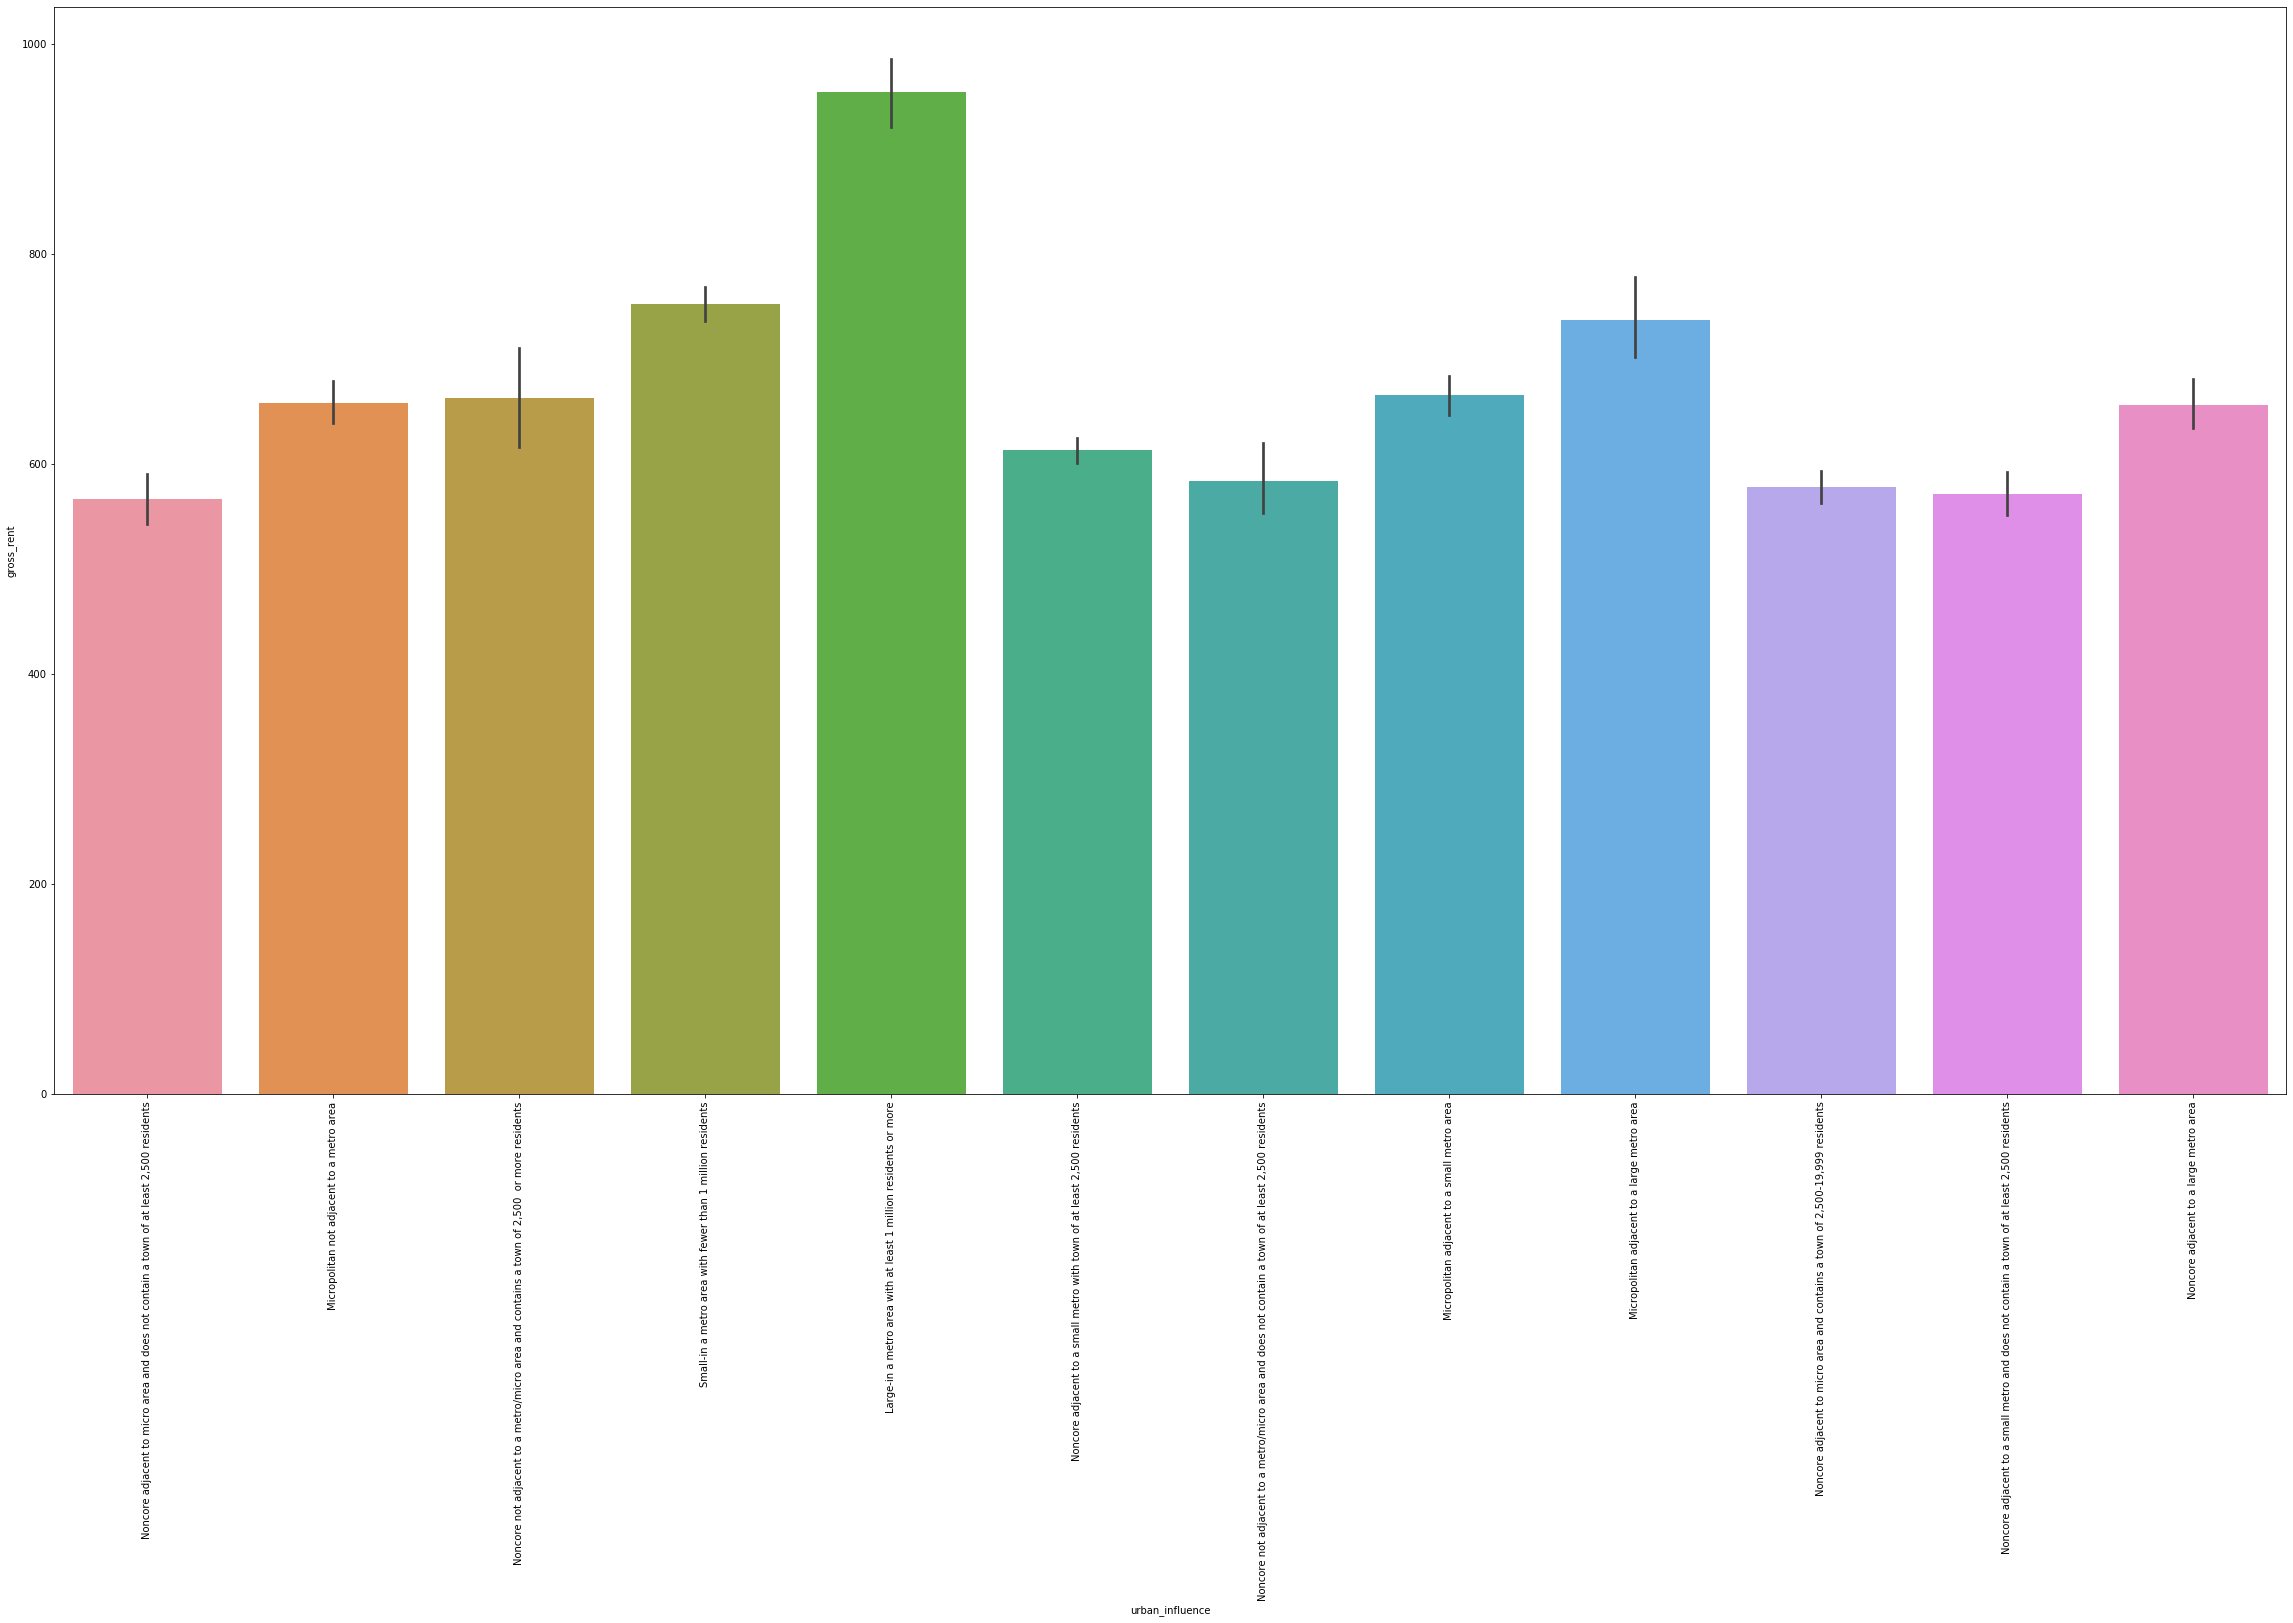

In [25]:
plt.figure(figsize=(40,20))
sns.barplot(x='urban_influence',y=df_cat.gross_rent,data=df_cat)
plt.xticks(rotation=90)
plt.show()

In [26]:
df_cat['economic_typology'].value_counts()

Nonspecialized                        631
Manufacturing-dependent               244
Farm-dependent                        217
Federal/State government-dependent    191
Recreation                            166
Mining-dependent                      113
Name: economic_typology, dtype: int64

In [27]:
df_cat['economic_typology'].nunique()

6

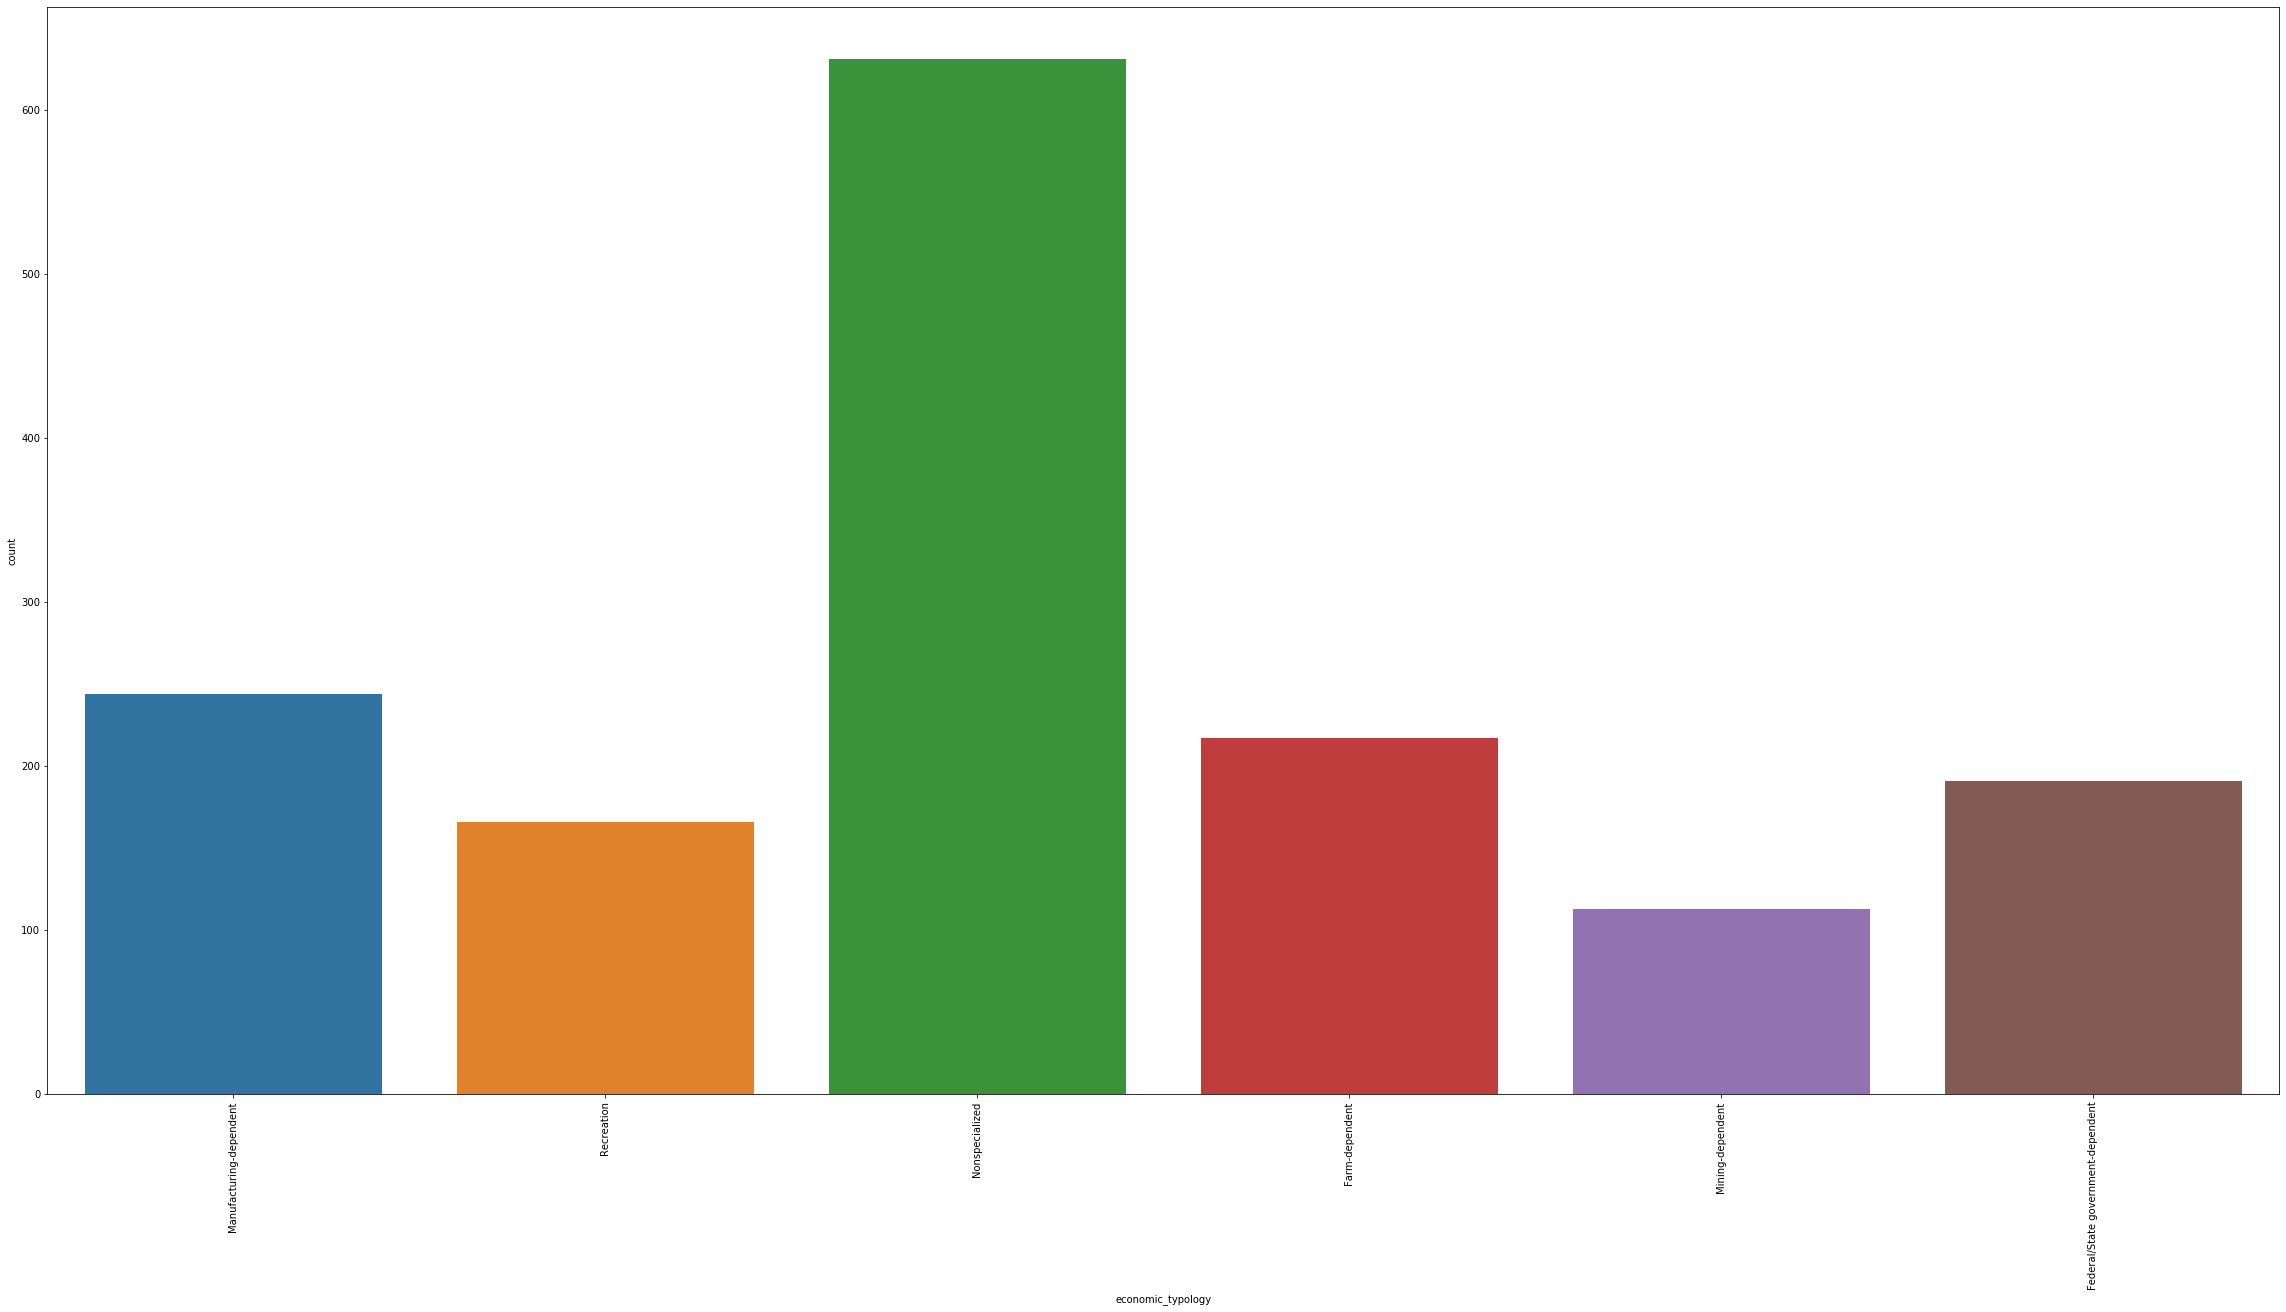

In [28]:
plt.figure(figsize=(40,20))
sns.countplot(x='economic_typology',data=df_cat)
plt.xticks(rotation=90)
plt.show()

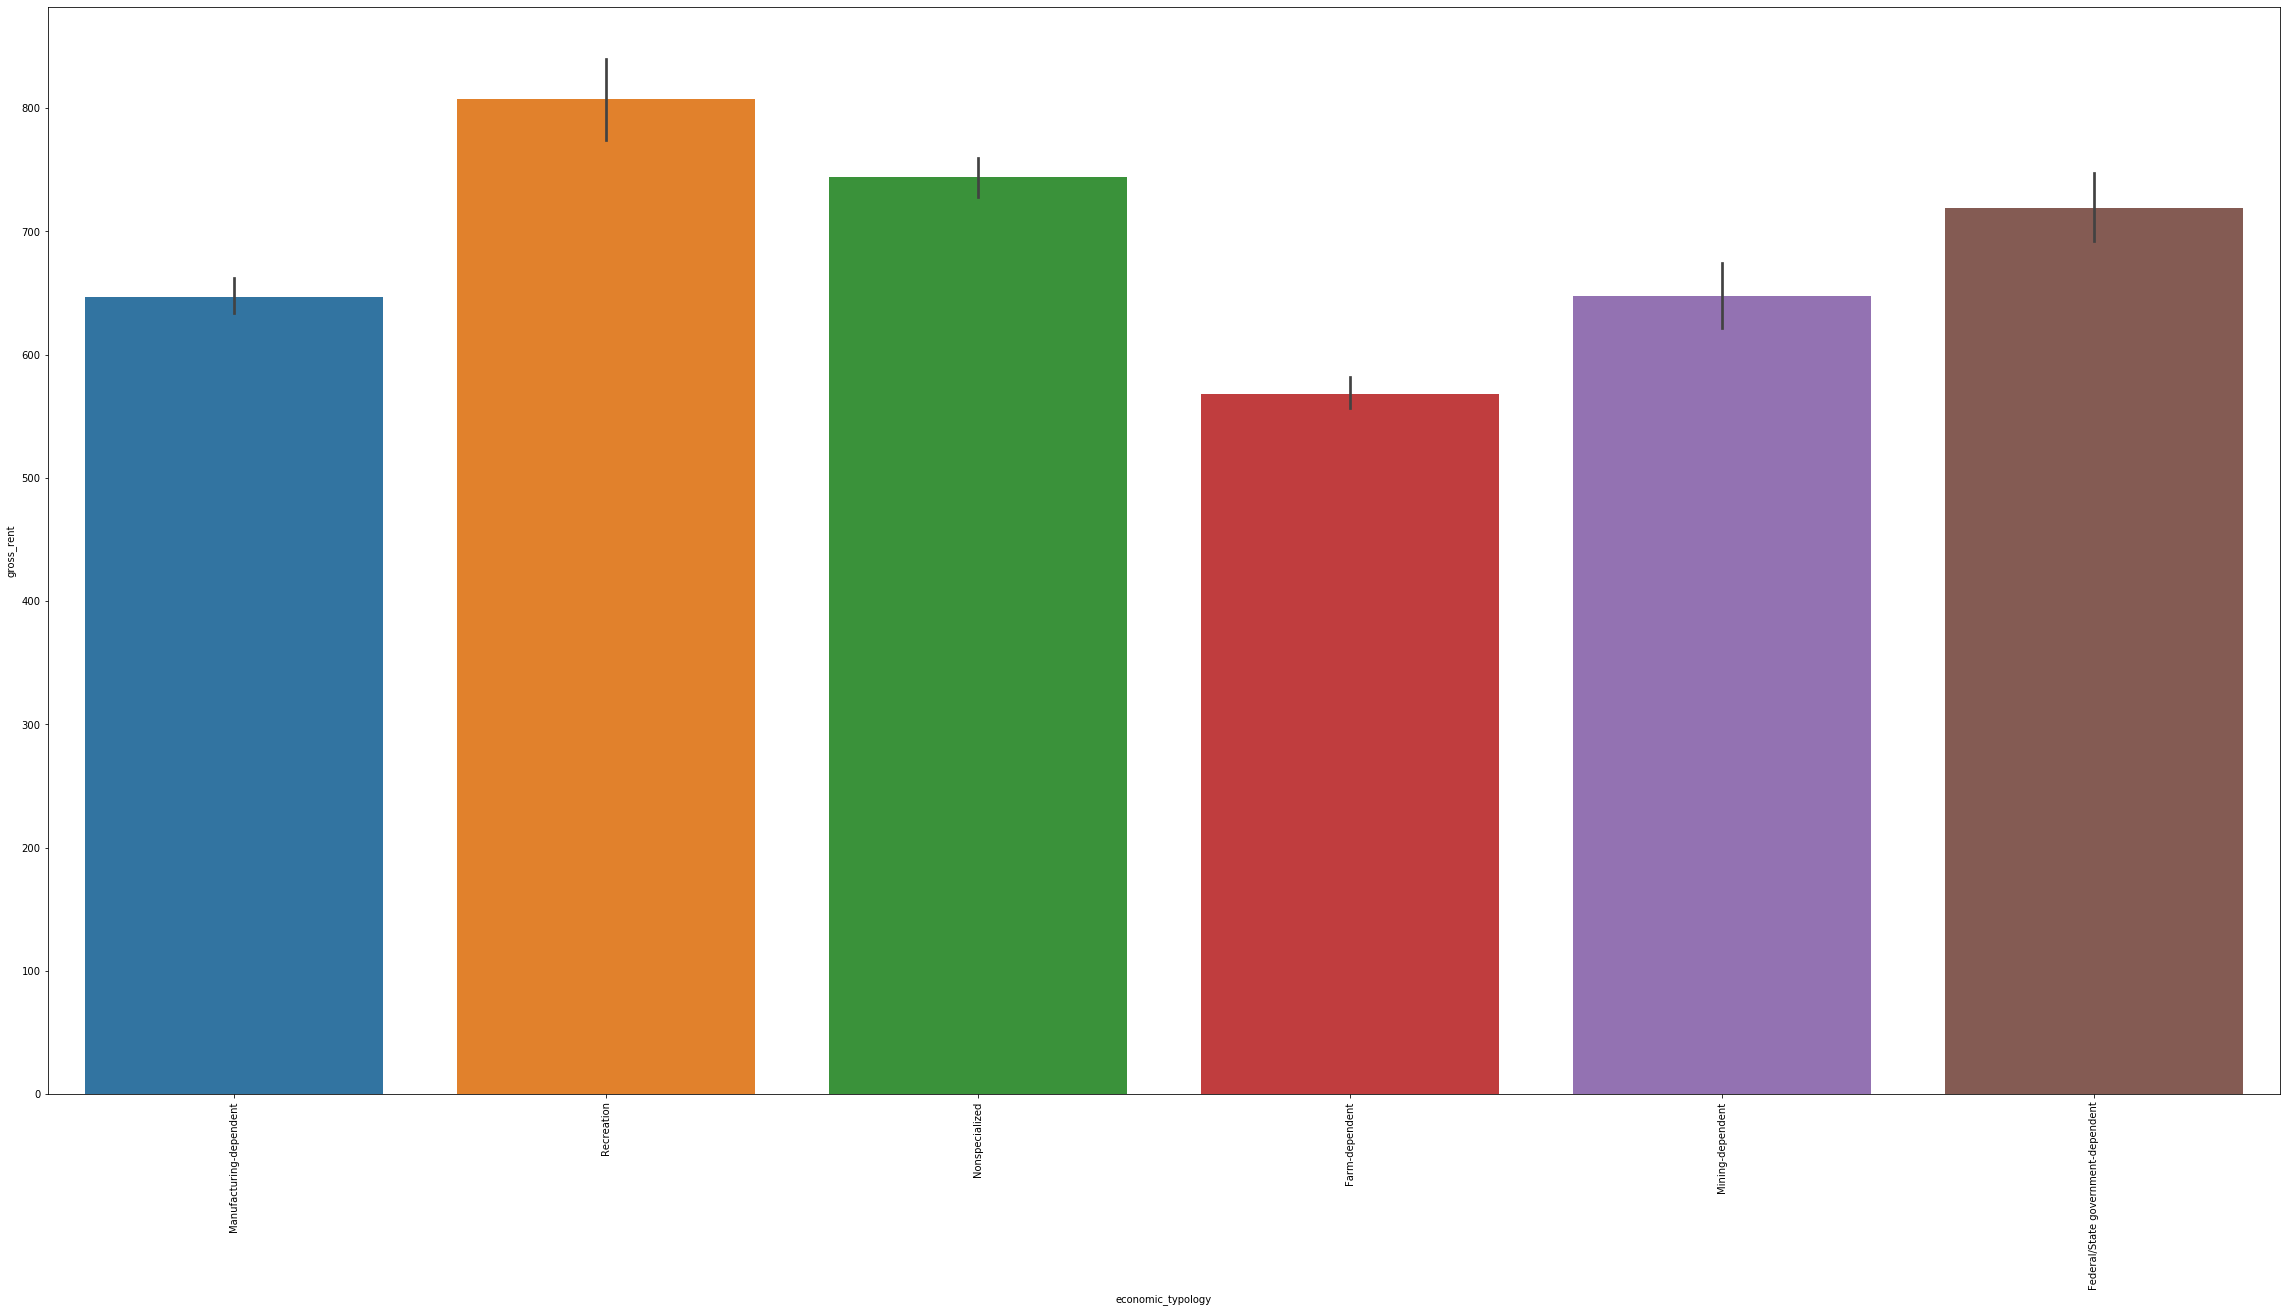

In [29]:
plt.figure(figsize=(40,20))
sns.barplot(x='economic_typology',y=df_cat.gross_rent,data=df_cat)
plt.xticks(rotation=90)
plt.show()

### Save to a csv file

In [30]:
#df_cat.to_csv("trainsetcategorical.csv", index=False)